# <div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Всё поправил! 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
data_old = data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
print(data.info())
display(data.head())
df = pd.DataFrame(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>Если ты работаешь локально, то следует указывать два пути к файлу через конструкцию try...except...
<br>Поправь, пожалуйста, чтобы я смог проверить твой проект. На всякий случай приложу путь к файлу на платформе
    
    /datasets/real_estate_data.csv'
</div>

Заметили следующее:

1. first_day_exposition - object - должен быть тип datetime
2. ceiling_height - нулевые значения
3. floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
4. is_apartment - должен быть тип bool + нулевые значения
5. living_area - нулевые значения
6. kitchen_area - нулевые значения
7. balcony - нулевые значения
8. locality_name - нулевые значения
9. airports_nearest - нулевые значения
10. cityCenters_nearest - нулевые значения
11. parks_around3000 - тип должен быть int + нулевые значения
12. parks_nearest - нулевые значения
13. ponds_around3000 - тип должен быть int + нулевые значения
14. ponds_nearest - нулевые значения
15. days_exposition - тип должен быть int + нулевые значения

In [3]:
dupl1 = data[data[['total_images', 'last_price','first_day_exposition','total_area']].duplicated(keep=False)]
dupl1.sort_values(by='total_images')
print('ТАБЛИЦА dupl1 :')
display(dupl1.sort_values(by='first_day_exposition'))

ТАБЛИЦА dupl1 :


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19052,3,4370000.0,38.00,2016-06-23T00:00:00,1,NaN,9.0,19.5,1,NaN,...,NaN,NaN,Санкт-Петербург,27103.0,7640.0,1.0,624.0,0.0,NaN,620.0
19325,3,4370000.0,38.00,2016-06-23T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,27103.0,7640.0,1.0,624.0,0.0,NaN,620.0
9661,1,2533531.0,42.50,2016-09-08T00:00:00,1,2.56,18.0,19.8,7,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
18425,1,2533531.0,42.50,2016-09-08T00:00:00,1,2.56,18.0,20.0,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
10099,10,4400000.0,44.00,2017-11-22T00:00:00,1,NaN,17.0,17.0,14,NaN,...,13.0,2.0,Санкт-Петербург,42901.0,9267.0,0.0,NaN,0.0,NaN,71.0
21142,10,4400000.0,44.00,2017-11-22T00:00:00,2,NaN,9.0,27.0,8,NaN,...,6.0,1.0,Санкт-Петербург,49917.0,16755.0,1.0,235.0,0.0,NaN,72.0
14739,10,5142565.0,54.65,2018-10-01T00:00:00,2,NaN,5.0,26.0,3,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0
18624,10,5142565.0,54.65,2018-10-01T00:00:00,2,NaN,5.0,26.0,5,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,145.0


In [4]:
pd.set_option('display.max_columns', None)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

In [5]:
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport
#ProfileReport(data)

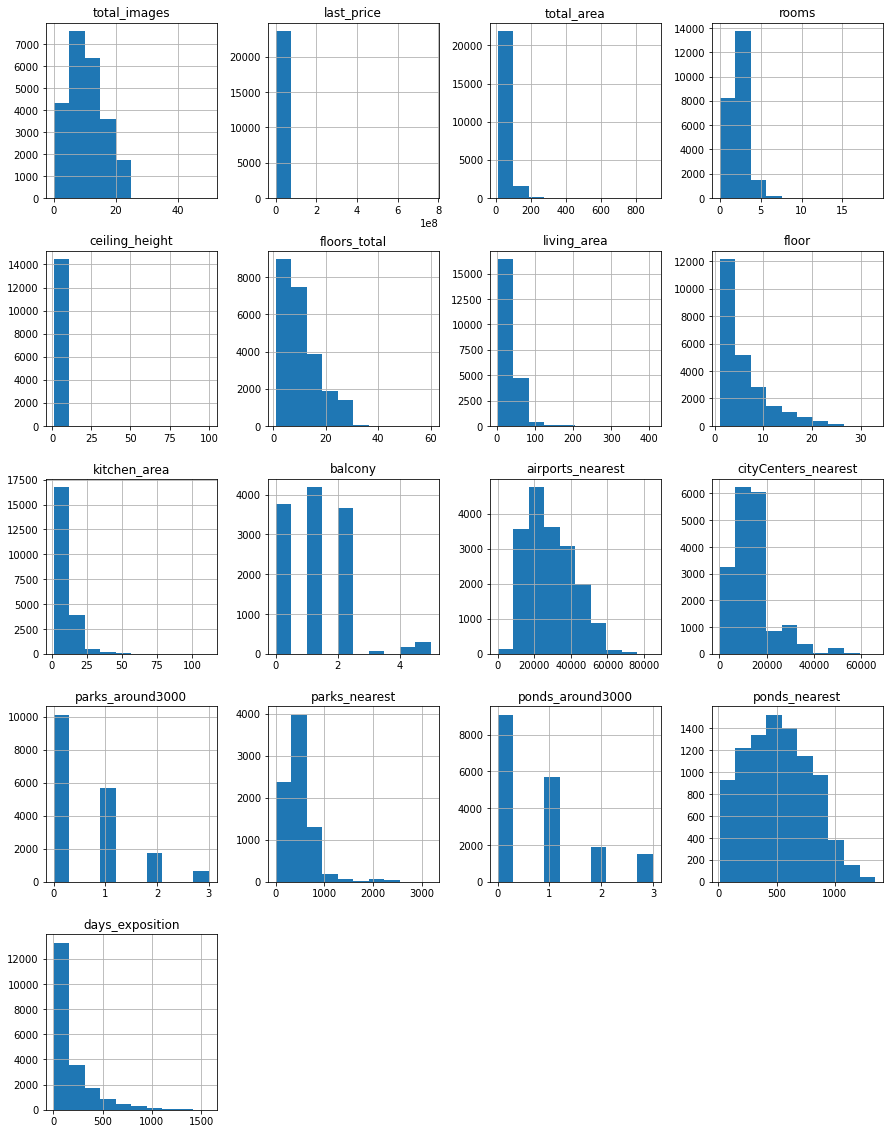

In [6]:
df.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

# Шаг 2. Предобработка данных

### 2.1 Определим в каких столбцах есть пропуски

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### 2.1.1 Столбец ceiling_height

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
Name: ceiling_height, dtype: float64 count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


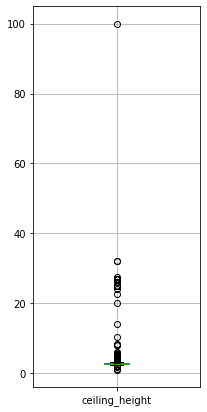

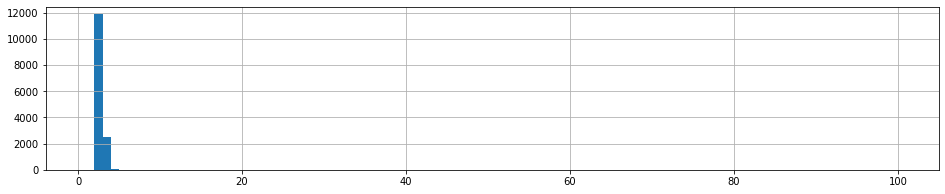

In [8]:
##################################################################################
#------- НАПИШЕМ ФУНКЦИЮ ДЛЯ ОПИСАНИЯ ЧИСЛОВЫХ СТОЛБЦОВ ( Данные + Графика )------ 
def descr_numeric(target_column):  # аргумент функции название столбца
    print(data[target_column].head(7), data[target_column].describe())
    data.boxplot(column=target_column, figsize=(3,7)); 
    plt.show()
    data[target_column].hist(figsize=(16,3), bins=100);
#---------------------------------------------------------------------------------
##################################################################################  
descr_numeric('ceiling_height')

Решим проблему с пропусками

In [9]:
print("Кол-во пропусков =", data['ceiling_height'].isna().sum())
print(data['ceiling_height'].describe())
print(data['ceiling_height'].value_counts())

Кол-во пропусков = 9195
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


Для замены лучше всего подойдет медианное значение столбца 265см (оно не подверженно влиянию тех значений которые расположены по концам столбца, где могут быть сильные отклонения, влияющие на среднюю величину)

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В этом столбце высота указана в метрах. Поэтому правильнее будет заменить пропуски на 2.65
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

# !!! ИСПРАВИЛ !!!

In [11]:
print("Кол-во пропусков =", data['ceiling_height'].isna().sum())
print()
print(data['ceiling_height'].describe())

Кол-во пропусков = 0

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [12]:
print('Длина всего data =',len(data))
print()

print(data['ceiling_height'].describe())
print()
print("Тип столбца -",data['ceiling_height'].dtype)

Длина всего data = 23699

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Тип столбца - float64


Столбец готов

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>менять тип данных в этом столбце не нужно. float отлично подходит
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

# !!! ИСПРАВИЛ !!!

### 2.1.2 Столбец living_area, kitchen_area

Заполним пропуски медианными значениями "living_area" в зависимости от "total_area", логично предположить (и жизненный опыт это подтвердит) что, чем больше общая площадь, тем больше площадь жилая и кухни, и тем больше доля другой(нежилой площади). Выведем диаграмму доли"living_area" в "total_area" в зависимости от "total_area"(благо этот столбец мы заполнили) и на будущее параллельно сделаем тоже для "kitchen_area". 

In [13]:
display(data.loc[:,['total_area', 'living_area', 'kitchen_area']])

,total_area,living_area,kitchen_area
0,108.00,51.0,25.00
1,40.40,18.6,11.00
2,56.00,34.3,8.30
3,159.00,NaN,NaN
4,100.00,32.0,41.00
...,...,...,...
23694,133.81,73.3,13.83
23695,59.00,38.0,8.50
23696,56.70,29.7,NaN
23697,76.75,NaN,23.30


In [14]:
print('-=Все значения рассчитываются, исключая студии=-')
print()
print("Кол-во квартир всего =", len(data.loc[data['studio']==False]))

print("Кол-во квартир со значением в жилой =", data.loc[(data['living_area'].isna() == False) & \
                                                        (data['studio']==False), 'living_area'].count(), )

print("Кол-во квартир со значением в кухне =", data.loc[(data['kitchen_area'].isna() == False) & \
                                                        (data['studio']==False), 'kitchen_area'].count(), )

-=Все значения рассчитываются, исключая студии=-

Кол-во квартир всего = 23550
Кол-во квартир со значением в жилой = 21657
Кол-во квартир со значением в кухне = 21421


Для удобства сделаем отдельный ДатаФрейм (без Студий)- Здесь будут оригиналы (на всякий случай; для сравнения и вывода графиков)

In [15]:
sq = pd.DataFrame(columns=['all','liv', 'kit']) # [Вся_площадь, Жилая, Кухня] - Здесь будут оригиналы
sq['all'] = data.loc[(data['total_area'].isna() == False) & (data['studio']==False), 'total_area']
sq['liv'] = data.loc[(data['living_area'].isna() == False) & (data['studio']==False), 'living_area']
sq['kit'] = data.loc[(data['kitchen_area'].isna() == False) & (data['studio']==False), 'kitchen_area']
print(sq)
print()

print("проверка совпадает ли с оригиналом")
print(data.loc[data['studio']==False, ['total_area', 'living_area', 'kitchen_area']])

          all   liv    kit
0      108.00  51.0  25.00
1       40.40  18.6  11.00
2       56.00  34.3   8.30
3      159.00   NaN    NaN
4      100.00  32.0  41.00
...       ...   ...    ...
23694  133.81  73.3  13.83
23695   59.00  38.0   8.50
23696   56.70  29.7    NaN
23697   76.75   NaN  23.30
23698   32.30  12.3   9.00

[23550 rows x 3 columns]

проверка совпадает ли с оригиналом
       total_area  living_area  kitchen_area
0          108.00         51.0         25.00
1           40.40         18.6         11.00
2           56.00         34.3          8.30
3          159.00          NaN           NaN
4          100.00         32.0         41.00
...           ...          ...           ...
23694      133.81         73.3         13.83
23695       59.00         38.0          8.50
23696       56.70         29.7           NaN
23697       76.75          NaN         23.30
23698       32.30         12.3          9.00

[23550 rows x 3 columns]


Рассчитаем Медианы и Средние доли кухни и жилой в общей площади а также добавим долю оставшейся площади (part_other)

In [16]:
part_kit = sq['kit'] / sq['all']
part_kit_median = part_kit.dropna().median()
part_kit_mean = part_kit.dropna().mean()
print("part_kit_median =", part_kit_median, "// part_kit_mean =", part_kit_mean)
print()
part_liv = sq['liv'] / sq['all']
part_liv_median = part_liv.dropna().median()
part_liv_mean = part_liv.dropna().mean()
print("part_liv_median =", part_liv_median, "// part_liv_mean =", part_liv_mean)

part_kit_median = 0.1724137931034483 // part_kit_mean = 0.18735473877174058

part_liv_median = 0.5671641791044776 // part_liv_mean = 0.5640161053362327


Медиана и среднее мало отличаются. Выберем медиану для дальнейших действий

In [17]:
part_kit = part_kit_median
part_liv = part_liv_median
part_other = 1 - part_liv_median - part_kit_median
print('part_other =',part_other)

part_other = 0.26042202779207413


Заполним пропуски в столбцах кухня и жилая значениями = (медиана x общую)
Начнем с кухни

In [18]:
ind_nan_kit = data.loc[(data['kitchen_area'].isna() == True) & (data['studio']==False)].index # Индексы где пропуски в значениях 'kitchen_area'
data.loc[ind_nan_kit, 'kitchen_area'] = part_kit * data.loc[ind_nan_kit, 'total_area']

In [19]:
print(data['kitchen_area'].describe())

count    23550.000000
mean        10.527503
std          6.029586
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [20]:
ind_nan_liv = data.loc[(data['living_area'].isna() == True) & (data['studio']==False)].index # Индексы где пропуски в значениях 'living_area'
data.loc[ind_nan_liv, 'living_area'] = part_liv * data.loc[ind_nan_liv, 'total_area']

In [21]:
print(data['living_area'].describe())

count    23689.000000
mean        34.583044
std         22.338524
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


Видно что присутствуют слишком маленькие значения как в кухнях (min = 1,3), так и в жилых (min = 2)

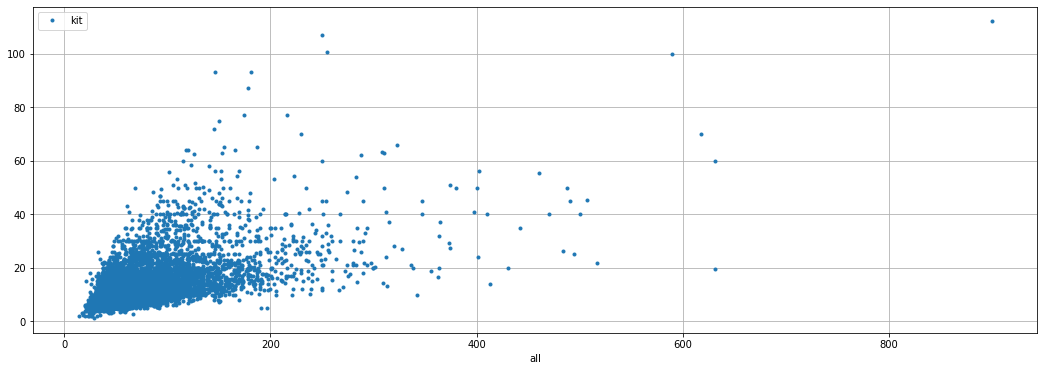

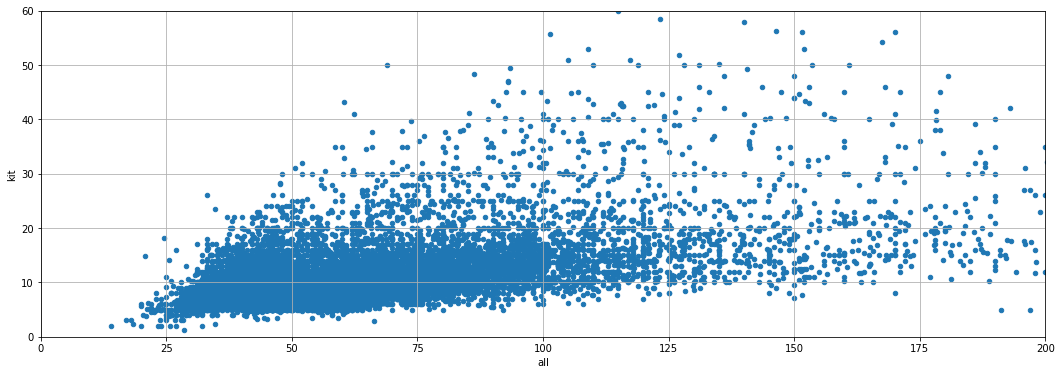

In [22]:
sq['kit'].describe()
sq.plot(y='kit', x='all', style=".", figsize=(18,6), grid=True);
plt.show
sq.plot(y='kit', x='all', kind='scatter', figsize=(18,6), grid=True, xlim=(0, 200), ylim=(0, 60));

Видно что есть слишком маленькие и слишком большие значения (их мало) кухни. Установим разумные пределы кухни (min_kit = 3 и max_kit = 40) и все что выходит за пределы заменим на предельные значения соответственно.

In [23]:
min_kit = 3
max_kit = 40

data.loc[(data['kitchen_area']<min_kit) & (data['studio']==False), 'kitchen_area'] = min_kit
data.loc[(data['kitchen_area']>max_kit) & (data['studio']==False), 'kitchen_area'] = max_kit

data.loc[(data['studio']==False),'kitchen_area'].describe()

count    23550.000000
mean        10.444032
std          5.383472
min          3.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         40.000000
Name: kitchen_area, dtype: float64

Посмотрим есть ли очень маленькие и большиие значения в жилой ('living_area')

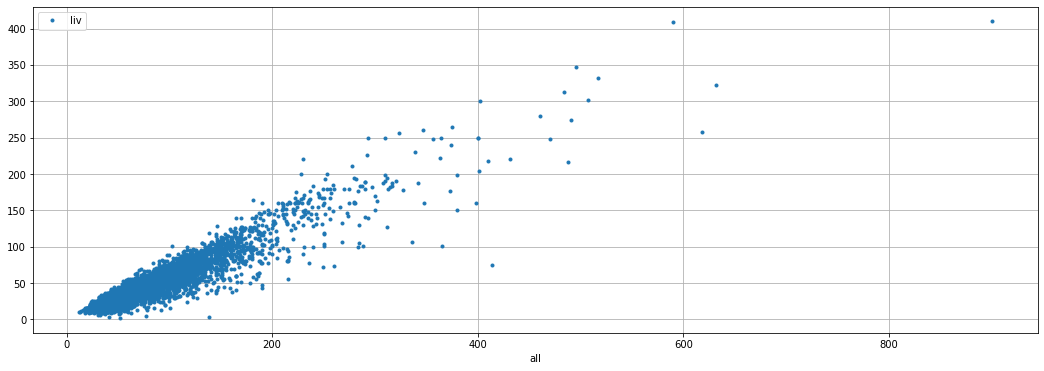

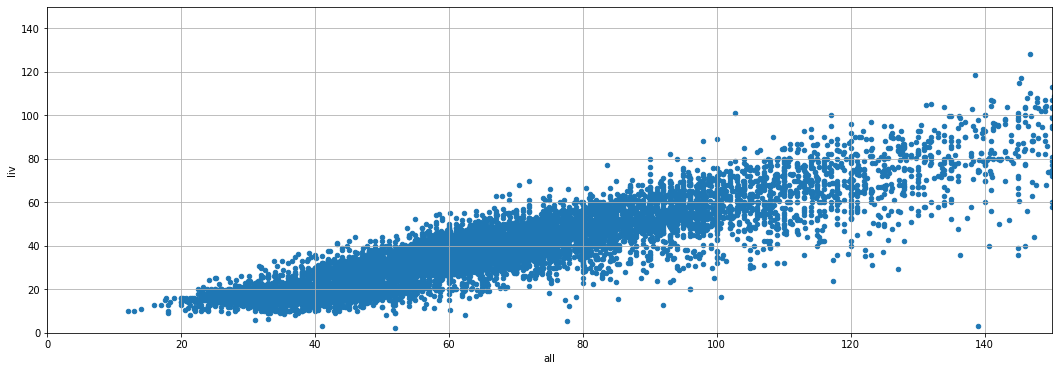

In [24]:
sq['liv'].describe()
sq.plot(y='liv', x='all', style=".", figsize=(18,6), grid=True);
plt.show
sq.plot(y='liv', x='all', kind='scatter', figsize=(18,6), grid=True, xlim=(0, 150), ylim=(0, 150));

In [25]:
print('ОБЩАЯ ПЛОЩАДЬ :')
data.loc[(data['studio']==False),'total_area'].describe()

ОБЩАЯ ПЛОЩАДЬ :


count    23550.000000
mean        60.554692
std         35.664542
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Видно что есть значения при которых жилая площадь слишком мала по сравнению с общей при медиане доли - part_liv_median = 0.567 (56,7%)
1. Малыми площадями будем считать если они меньше 30% от общей
2. Заполним эти значения 40% (~середина между общ-56,7% и нежил-26.6%) от общей площадей.
3. Также установим минимальный размер жилой площади = 5 кв.м (уж меньше некуда)
4. И еще сделаем корректировку для квартир с общей площадью < 140 кв.м (там где площадь больше чем 140, там более менее сносные значения, и в них сильно будут отличаться от средней пропорции жилой/нежилой/кухни)

In [26]:
ind_lst = data.loc[ (data['living_area'] < data['total_area']*0.3) & (data['total_area']<140) & (data['studio']==False) ].index
data.loc[ind_lst, 'living_area'] = data.loc[ind_lst, 'total_area'] * 0.4

count    23689.000000
mean        34.643676
std         22.304078
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


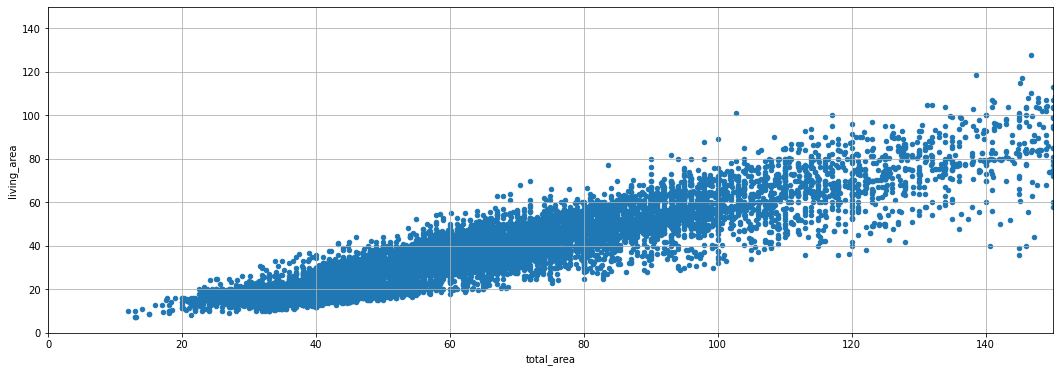

In [27]:
print(data['living_area'].describe())
data[(data['studio']==False)].plot(
    y='living_area', x='total_area', kind='scatter', figsize=(18,6), grid=True, xlim=(0, 150), ylim=(0, 150));

Теперь проверим корректность проделанного. Сверим оставшиеся помещения - другие (нежилые = общая - жилая - кухня) с разумным минимумом равным 4 кв.м (коридор=1,5 + (туалет+ванна)=2,5 = 4). Итого в самой маленькой квартире 12кв.м = 3кух + 5жил + 4нежил Минимум 7,37 - по минимуму проходим. (зато по общей площади теперь переполнение) Вспомним и запишем минимумы:
1. kit_min = 3
2. liv_min = 5
3. noliv_min = 4

In [28]:
it_min = 3
liv_min = 5
noliv_min = 4


# Индексы где другая (нежилая) площадь меньше noliv_min
ind_small_noliv = data.loc[ (data['studio']==False) & (((data['total_area'] - data['living_area'] - \
                                                        data['kitchen_area']) < noliv_min) )].index
display(data.loc[ind_small_noliv,['total_area', 'living_area','kitchen_area']])

# Выводим значения со слишком маленькой нежилой площадья
square_table = data.loc[ind_small_noliv,'total_area'] - data.loc[ind_small_noliv,'living_area'] - \
data.loc[ind_small_noliv,'kitchen_area']
print(square_table)
square_table.describe()

,total_area,living_area,kitchen_area
41,74.0,59.00,12.000000
171,49.0,38.00,10.000000
184,30.2,26.10,6.200000
220,37.0,28.00,9.000000
237,28.1,20.75,4.844828
...,...,...,...
23297,48.2,42.20,6.000000
23579,24.8,18.00,4.275862
23610,29.0,18.60,6.600000
23611,37.0,25.00,8.020000


41       3.000000
171      1.000000
184     -2.100000
220      0.000000
237      2.505172
           ...   
23297    0.000000
23579    2.524138
23610    3.800000
23611    3.980000
23680    0.000000
Length: 506, dtype: float64


count    506.000000
mean       0.368733
std        4.081443
min      -29.655172
25%        0.000000
50%        1.339655
75%        2.902586
max        3.980000
dtype: float64

Присутствуют отрицательные значения. Восполним остальную площадь до минимума (5кв.м) за счет жилой и кухни. Будем урезать каждую на 2%, пока пока не будут достигнуты минимумы или другая(нежилая) станет около 5 кв.м

In [29]:
# -------ФУНКЦИЯ---------------------  
def cut_square(ind):
    kit = data.loc[ind, 'kitchen_area']
    liv = data.loc[ind, 'living_area']
    tot = data.loc[ind, 'total_area']
    kit_min = 3
    liv_min = 5
    noliv_min = 4
    cut = 0.98 # Коэффициент на который надо умножить чтобы обрезать значение на 2%
    while noliv_min >= tot - kit - liv:
        if liv > liv_min:
            liv = liv * cut  # Обрезаем на 2% жилую
        if kit > kit_min:
            kit = kit * cut  # Обрезаем на 2% кухню
        
    noliv = tot - kit - liv    
    data.loc[ind, 'kitchen_area'] = kit
    data.loc[ind, 'living_area'] = liv
    return [ind, tot, liv, kit, noliv] # Соберем
    
# ------------------------------------    

# i = []
c=0 # Счетчик замен
for index in ind_small_noliv:
#     i.append(cut_square(index))
    print(data.loc[index,['total_area', 'living_area', 'kitchen_area']])
    print(cut_square(index))
    print(data.loc[index,['total_area', 'living_area', 'kitchen_area']])
#     input()
    print()
    c+=1
print("Произведенено замен =",c)

total_area      74.0
living_area     59.0
kitchen_area    12.0
Name: 41, dtype: object
[41, 74.0, 57.82, 11.76, 4.420000000000002]
total_area       74.0
living_area     57.82
kitchen_area    11.76
Name: 41, dtype: object

total_area      49.0
living_area     38.0
kitchen_area    10.0
Name: 171, dtype: object
[171, 49.0, 35.04999008000001, 9.2236816, 4.726328319999993]
total_area          49.0
living_area     35.04999
kitchen_area    9.223682
Name: 171, dtype: object

total_area      30.2
living_area     26.1
kitchen_area     6.2
Name: 184, dtype: object
[184, 30.2, 20.899088254569673, 4.964534374648734, 4.3363773707815945]
total_area           30.2
living_area     20.899088
kitchen_area     4.964534
Name: 184, dtype: object

total_area      37.0
living_area     28.0
kitchen_area     9.0
Name: 220, dtype: object
[220, 37.0, 24.803586664192, 7.972581427775999, 4.223831908032]
total_area           37.0
living_area     24.803587
kitchen_area     7.972581
Name: 220, dtype: object

total_are

In [30]:
square_table = data.loc[ind_small_noliv,'total_area'] - data.loc[ind_small_noliv,'living_area'] - \
data.loc[ind_small_noliv,'kitchen_area']
print(square_table)
print(square_table.describe())
data.loc[:,['total_area','living_area','kitchen_area']].describe()

41       4.420000
171      4.726328
184      4.336377
220      4.223832
237      4.010353
           ...   
23297    4.631018
23579    4.253454
23610    4.304000
23611    4.640400
23680    4.580279
Length: 506, dtype: float64
count    506.000000
mean       4.417209
std        0.361492
min        4.001682
25%        4.167065
50%        4.336400
75%        4.540000
max        7.267758
dtype: float64


,total_area,living_area,kitchen_area
count,23699.000000,23689.000000,23550.000000
mean,60.348651,34.579524,10.421576
std,35.654083,22.285408,5.359814
min,12.000000,2.000000,2.944123
25%,40.000000,19.000000,7.000000
50%,52.000000,30.000000,9.000000
75%,69.900000,42.100000,12.000000
max,900.000000,409.700000,40.000000


Вроде все получилось, немножко вылезли некоторые значения 'living_area', 'kitchen_area' за 5 и 3 кв.м, это получилось из-за того, что значения при корректировке были чуть выше kit_min = 3 / liv_min = 5 и -2% получим что имеем. Можно было отрезать не по 2%, а скажем по 0,1%, тогда отклонение было бы меньше. Полученый результат вполне допустим.

Теперь для наглядности округлим значения 'living_area', 'kitchen_area' до одной десятой

In [31]:
print(data[['living_area', 'kitchen_area']].head(7))
data[['living_area', 'kitchen_area']] = round(data[['living_area', 'kitchen_area']],1)
print(data[['living_area', 'kitchen_area']].head(7))

   living_area  kitchen_area
0    51.000000     25.000000
1    18.600000     11.000000
2    34.300000      8.300000
3    90.179104     27.413793
4    32.000000     40.000000
5    14.400000      9.100000
6    14.920000     14.400000
   living_area  kitchen_area
0         51.0          25.0
1         18.6          11.0
2         34.3           8.3
3         90.2          27.4
4         32.0          40.0
5         14.4           9.1
6         14.9          14.4


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23550 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

ВЫВОД: 'living_area', 'kitchen_area' - готовы, но надо помнить что , в строках где квартиры-студии в колонке кухни будет стоять NaN (149 строк). В вышеприведенном отчете это видно

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа!
</div>

### 2.1.3 Столбец balkony

In [33]:
print(data['balcony'].value_counts())
print()
print("Кол-во NaN =",data['balcony'].isna().sum())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Кол-во NaN = 11519


In [34]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].value_counts())
print("Кол-во NaN =",data['balcony'].isna().sum())



0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64
Кол-во NaN = 0


Все получилось, NaN поменяли на 0 (так больше похоже на правду) и поменяли тип на int

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если в данном столбце пропуск, то логично предположить что балкона нет. Пропуски нужно заполнить нулем
</div>
V.2 я исправил ведь на нули

# !!! ИСПРАВИЛ !!!

### 2.1.4 Столбец is_apartment

In [35]:
print(data['is_apartment'].value_counts(), " // Тип = ", data['is_apartment'].dtype)

False    2725
True       50
Name: is_apartment, dtype: int64  // Тип =  object


In [36]:
data.loc[data['is_apartment'] != True, 'is_apartment'] = False
data['is_apartment'] = data['is_apartment'].astype('bool')
print(data['is_apartment'].value_counts(), " // Тип = ", data['is_apartment'].dtype)

False    23649
True        50
Name: is_apartment, dtype: int64  // Тип =  bool


ВЫВОД: Всё в порядке (это большая редкость)

### 2.1.5 Столбец studio

In [37]:
print(data['studio'].value_counts(), " // Тип = ", data['studio'].dtype)

False    23550
True       149
Name: studio, dtype: int64  // Тип =  bool


In [38]:
display(data.loc[data['studio']==True, ['total_area', 'living_area', 'kitchen_area']])
print('Для проверки - посчитаем сколько Студий без кухни(должно быть 149) Расчетное значение =',data.loc[data['studio']==True]['kitchen_area'].isna().sum())

,total_area,living_area,kitchen_area
144,27.00,15.5,NaN
440,27.11,24.8,NaN
608,25.00,NaN,NaN
697,24.10,17.5,NaN
716,17.00,12.0,NaN
...,...,...,...
22867,30.00,18.2,NaN
22877,28.00,18.0,NaN
23210,26.00,18.0,NaN
23554,26.00,NaN,NaN


Для проверки - посчитаем сколько Студий без кухни(должно быть 149) Расчетное значение = 149


Здесь всё в порядке!

### 2.1.6 Столбец airports_nearest

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставить их как есть.
</div>

# !!! ИСПРАВИЛ !!!

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
5        NaN
6    52996.0
Name: airports_nearest, dtype: float64 count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


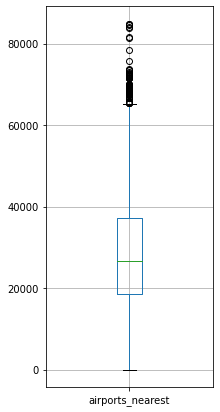

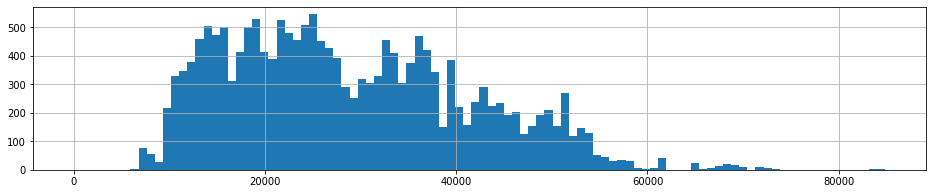

In [39]:
descr_numeric('airports_nearest')

Выбросов вроде нет зато есть нули, надо рассмотреть подробнее

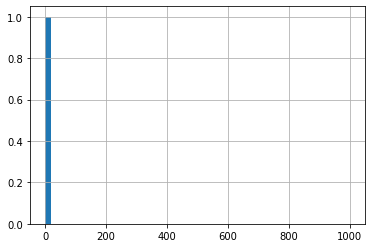

In [40]:
data['airports_nearest'].hist(range=(0,1000),bins=50);

In [41]:
data[data['airports_nearest']<50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего одна строка, это Санкт-Петербург, 0 заменили на Nan и обработаем вместе с остальными пропусками

In [42]:
data.loc[21003, 'airports_nearest'] = np.nan
data.loc[21003]

total_images                             15
last_price                        2999000.0
total_area                             42.0
first_day_exposition    2015-03-13T00:00:00
rooms                                     2
ceiling_height                         2.65
floors_total                            9.0
living_area                            25.0
floor                                     9
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            7.0
balcony                                 0.0
locality_name                     Сертолово
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                       473.0
Name: 21003, dtype: object

In [43]:
# loc_median - здесь сохрним медианы расстояний по населенным пунктам

#print('Медианы расстояний airports_nearest в locality_name : ')
#loc_median = data.groupby('locality_name')['airports_nearest'].median().sort_values()
#loc_median = loc_median.dropna()
#display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
#def med_insert(loc_dist):
#    if loc_dist not in loc_median:
#        return np.nan
#    return loc_median[loc_dist]


#print('Проверка работы med_insert: поселок Понтонный - ', med_insert('поселок Понтонный')) 
#print('Проверка работы med_insert: поселок Усть-Ижора - ', med_insert('поселок Усть-Ижора'))

In [44]:
# Выборка для проверки
#print('Всего пропущенных значений в столбце =', data['airports_nearest'].isna().sum())
#test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['airports_nearest'].isna()==True)].index
#print("Всего пропущенных значений в Санкт-Петербург =", len(test_ind))
#display(data.loc[test_ind,['locality_name','airports_nearest']].head(12))

In [45]:
# ДЕЛАЕМ ЗАМЕНУ
#data.loc[data['airports_nearest'].isna()==True, 'airports_nearest'] = data['locality_name'].apply(med_insert)

In [46]:
# ПРОВЕРЯЕМ
#display(data.loc[test_ind,['locality_name','airports_nearest']].head(12))

Проверим сколько осталось пропусков и найдем медианцу столбца

In [47]:
#print("Кол-во пропусков оставшихся =", data['airports_nearest'].isna().sum())



ВЫВОД: Осталось очень много пропусков. По-скольку для поставленных целей столбец не нужен - оставим как есть.

### 2.1.7 Столбец cityCenters_nearest

In [48]:
# loc_median - здесь сохрним медианы расстояний по населенным пунктам

print('Медианы расстояний cityCenters_nearest в locality_name : ')
loc_median = data.groupby('locality_name')['cityCenters_nearest'].median().sort_values()
loc_median = loc_median.dropna()
display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]


print('Проверка работы med_insert: поселок Песочный - ', med_insert('поселок Песочный')) 
print('Проверка работы med_insert: поселок Петро-Славянка - ', med_insert('поселок Петро-Славянка'))

Медианы расстояний cityCenters_nearest в locality_name : 


locality_name
Санкт-Петербург            12244.5
посёлок Парголово          19311.0
поселок Мурино             21888.0
посёлок Стрельна           23506.0
посёлок Шушары             24212.0
посёлок Левашово           25727.0
посёлок Песочный           26099.5
посёлок Петро-Славянка     27165.0
посёлок Лисий Нос          27297.0
посёлок Александровская    27468.0
посёлок Металлострой       27602.0
Пушкин                     27930.5
посёлок Усть-Ижора         28222.5
поселок Лисий Нос          28246.0
Красное Село               29140.5
Name: cityCenters_nearest, dtype: float64

Проверка работы med_insert: поселок Песочный -  nan
Проверка работы med_insert: поселок Петро-Славянка -  nan


In [49]:
# Выборка для проверки
print('Всего пропущенных значений в столбце =', data['cityCenters_nearest'].isna().sum())
test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['cityCenters_nearest'].isna()==True)].index
print("Всего пропущенных значений в Санкт-Петербург =", len(test_ind))
display(data.loc[test_ind,['locality_name','cityCenters_nearest']].head(12))

Всего пропущенных значений в столбце = 5519
Всего пропущенных значений в Санкт-Петербург = 61


,locality_name,cityCenters_nearest
81,Санкт-Петербург,NaN
593,Санкт-Петербург,NaN
604,Санкт-Петербург,NaN
742,Санкт-Петербург,NaN
795,Санкт-Петербург,NaN
1336,Санкт-Петербург,NaN
1872,Санкт-Петербург,NaN
1895,Санкт-Петербург,NaN
2364,Санкт-Петербург,NaN
2707,Санкт-Петербург,NaN


In [50]:
data.loc[data['cityCenters_nearest'].isna()==True, 'cityCenters_nearest'] = data['locality_name'].apply(med_insert)

In [51]:
display(data.loc[test_ind,['locality_name','cityCenters_nearest']].head(12))

,locality_name,cityCenters_nearest
81,Санкт-Петербург,12244.5
593,Санкт-Петербург,12244.5
604,Санкт-Петербург,12244.5
742,Санкт-Петербург,12244.5
795,Санкт-Петербург,12244.5
1336,Санкт-Петербург,12244.5
1872,Санкт-Петербург,12244.5
1895,Санкт-Петербург,12244.5
2364,Санкт-Петербург,12244.5
2707,Санкт-Петербург,12244.5


Проверим сколько осталось пропусков и найдем медианцу столбца

In [52]:
print("Кол-во пропусков оставшихся =", data['cityCenters_nearest'].isna().sum())

Кол-во пропусков оставшихся = 5394


Всего пропущенных значений было в столбце = 18778

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23689 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23550 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вернемся к данным приведенным в начале обработки столбца 16.airports_nearest:

airports_nearest 18157 non-null float64

cityCenters_nearest 18180 non-null float64

parks_around3000 18181 non-null float64

parks_nearest 8079 non-null float64

ponds_around3000 18181 non-null float64

ponds_nearest 9110 non-null float64

У выделенных столбцов около 18181 значение. Проверим заполненные/пропущенные значения в одних и тех же строках?

In [54]:
# заполненные

# matches_False = data.loc[(data['airports_nearest'].isna()==False) & (data['cityCenters_nearest'].isna()==False) & \
#          (data['parks_around3000'].isna()==False) & (data['ponds_around3000'].isna()==False),'locality_name'].count()

matches_False = data.query('airports_nearest.isna()==False and cityCenters_nearest.isna()==False and \
                                parks_around3000.isna()==False and ponds_around3000.isna()==False')

print('Количество строк в которых одномременно заполненны все 4 столбца =', matches_False['locality_name'].count())

Количество строк в которых одномременно заполненны все 4 столбца = 18116


In [55]:
# пропущенные

# matches_True = data.loc[(data['airports_nearest'].isna()==True) & (data['cityCenters_nearest'].isna()==True) & \
#          (data['parks_around3000'].isna()==True) & (data['ponds_around3000'].isna()==True),'locality_name'].count()

#---- !! matches_True - сохраним для баг-репорта ------------------------------------
matches_True = data.query('airports_nearest.isna()==True and cityCenters_nearest.isna()==True and \
                                parks_around3000.isna()==True and ponds_around3000.isna()==True')

print('Количество строк в которых одномременно НЕзаполненны все 4 столбца =', matches_True['locality_name'].count())

display(matches_True.groupby('locality_name')['locality_name'].count().sort_values().tail(15))

Количество строк в которых одномременно НЕзаполненны все 4 столбца = 5386


locality_name
Коммунар                    89
Никольское                  93
Кингисепп                  104
Тосно                      104
Волхов                     111
Сланцы                     112
Кириши                     125
Сертолово                  142
деревня Новое Девяткино    144
Кудрово                    173
Выборг                     237
деревня Кудрово            299
Гатчина                    307
Всеволожск                 398
посёлок Мурино             522
Name: locality_name, dtype: int64

Оставшиеся пропущенные значения в столбце cityCenters_nearest заполнить не представляется возможным, так как если заполнить медианой или средней по всему столбцу это очень сильно может повлиять на исследовательский анализ и сильно исказить результаты и выводы. Поэтому оставим все как есть, и будем выполнять анализ с таким количеством пропусков.

In [56]:
matches_True.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.4,26,False,False,False,8.8,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.0,5,False,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,False,False,False,11.0,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.6,2,False,False,False,5.7,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


### 2.1.8 Столбец park_around

In [57]:
data['parks_around3000'].value_counts(dropna=False)

0.0    10106
1.0     5681
NaN     5518
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Поскольку видно, что значение 0 это большинство и логично, что при заполнениии если значение не проставлено, то оно равно 0,- заполним пропуски 0. (Так же учтем то, что этот столбец бесполезен для выполнения задачи не будем тратить время на него). И изменим тип на int

In [58]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
display(data['parks_around3000'].value_counts(dropna=False))
data['parks_around3000'] = data['parks_around3000'].astype(int)
print(data['parks_around3000'].dtype)

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

int64


ВЫВОД: Столбец корректен.

### 2.1.9 Столбец parks_nearest

0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
5      NaN
6      NaN
Name: parks_nearest, dtype: float64 count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


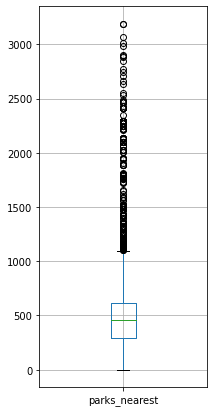

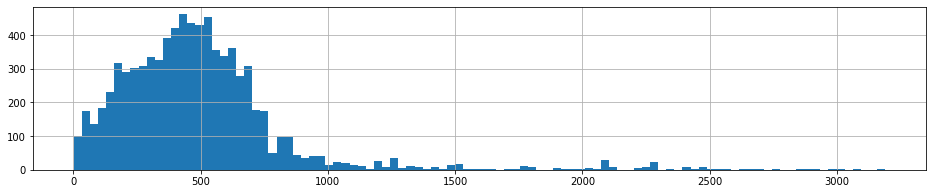

In [59]:
 descr_numeric('parks_nearest')

Будем заполнять пропуски по аналогии со столбцом cityCenters_nearest и airports_nearest по соответствию населенному пункту

In [60]:
# loc_median - здесь сохрним медианы расстояний по населенным пунктам

print('Медианы расстояний parks_nearest в locality_name : ')
loc_median = data.groupby('locality_name')['parks_nearest'].median().sort_values()
loc_median = loc_median.dropna()
display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]


print('Проверка работы med_insert: Сестрорецк - ', med_insert('Сестрорецк')) 
print('Проверка работы med_insert: поселок Зеленогорск - ', med_insert('Зеленогорск'))

Медианы расстояний parks_nearest в locality_name : 


locality_name
Зеленогорск          147.5
Кронштадт            293.0
Петергоф             294.0
Павловск             312.0
Сестрорецк           367.0
Колпино              393.0
Пушкин               399.5
Ломоносов            407.0
Красное Село         428.5
Санкт-Петербург      460.0
посёлок Стрельна     700.0
посёлок Парголово    733.0
Name: parks_nearest, dtype: float64

Проверка работы med_insert: Сестрорецк -  367.0
Проверка работы med_insert: поселок Зеленогорск -  147.5


In [61]:
# Выборка для проверки
print('Всего пропущенных значений в столбце =', data['parks_nearest'].isna().sum())
test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['parks_nearest'].isna()==True)].index
print("Всего пропущенных значений в Санкт-Петербург =", len(test_ind))
display(data.loc[test_ind,['locality_name','parks_nearest']].head(12))

Всего пропущенных значений в столбце = 15620
Всего пропущенных значений в Санкт-Петербург = 8437


,locality_name,parks_nearest
7,Санкт-Петербург,NaN
9,Санкт-Петербург,NaN
17,Санкт-Петербург,NaN
19,Санкт-Петербург,NaN
25,Санкт-Петербург,NaN
26,Санкт-Петербург,NaN
31,Санкт-Петербург,NaN
32,Санкт-Петербург,NaN
34,Санкт-Петербург,NaN
35,Санкт-Петербург,NaN


In [62]:
# ДЕЛАЕМ ЗАМЕНУ
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(med_insert)

In [63]:
# ПРОВЕРЯЕМ
display(data.loc[test_ind,['locality_name','parks_nearest']].head(12))

,locality_name,parks_nearest
7,Санкт-Петербург,460.0
9,Санкт-Петербург,460.0
17,Санкт-Петербург,460.0
19,Санкт-Петербург,460.0
25,Санкт-Петербург,460.0
26,Санкт-Петербург,460.0
31,Санкт-Петербург,460.0
32,Санкт-Петербург,460.0
34,Санкт-Петербург,460.0
35,Санкт-Петербург,460.0


In [64]:
print("Кол-во пропусков оставшихся =", data['parks_nearest'].isna().sum())

Кол-во пропусков оставшихся = 6032


Было пропусков 8079 осталось 5996 - большую часть значений заполнили, теперь со значениями около 18 тысяч.

Остальные не заполняем по аналогии с другими столбцами с расстояниями

### 2.1.10 Столбец ponds_around3000

In [65]:
data['ponds_around3000'].value_counts(dropna=False)

0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [66]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
display(data['ponds_around3000'].value_counts(dropna=False))
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
print(data['ponds_around3000'].dtype)

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

int64


ВЫВОД: Столбец корректен.

### 2.1.11 Столбец ponds_nearest

0    755.0
1      NaN
2    574.0
3    234.0
4     48.0
5      NaN
6      NaN
Name: ponds_nearest, dtype: float64 count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


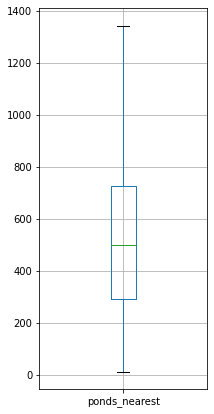

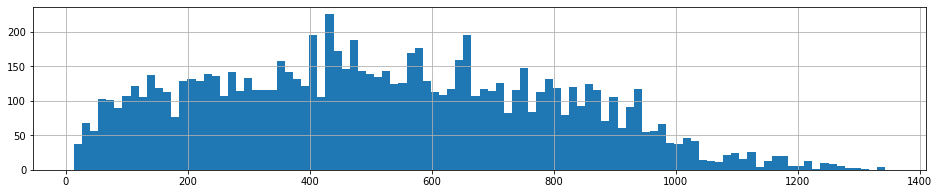

In [67]:
 descr_numeric('ponds_nearest')

In [68]:
#loc_median - здесь сохрним медианы расстояний по населенным пунктам

print('Медианы расстояний ponds_nearest в locality_name : ')
loc_median = data.groupby('locality_name')['ponds_nearest'].median().sort_values()
loc_median = loc_median.dropna()
display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]


print('Проверка работы med_insert: Сестрорецк - ', med_insert('Сестрорецк')) 
print('Проверка работы med_insert: поселок Зеленогорск - ', med_insert('Зеленогорск'))

Медианы расстояний ponds_nearest в locality_name : 


locality_name
поселок Мурино        133.0
Красное Село          225.5
Кронштадт             312.0
посёлок Белоостров    320.0
Сестрорецк            372.0
посёлок Сапёрный      419.5
Пушкин                444.0
Павловск              458.0
Петергоф              474.0
Санкт-Петербург       503.0
Зеленогорск           507.0
Колпино               509.0
Ломоносов             553.0
посёлок Шушары        584.5
посёлок Парголово     593.0
Name: ponds_nearest, dtype: float64

Проверка работы med_insert: Сестрорецк -  372.0
Проверка работы med_insert: поселок Зеленогорск -  507.0


In [69]:
# Выборка для проверки
print('Всего пропущенных значений в столбце =', data['ponds_nearest'].isna().sum())
test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['ponds_nearest'].isna()==True)].index
print("Всего пропущенных значений в Санкт-Петербург =", len(test_ind))
display(data.loc[test_ind,['locality_name','ponds_nearest']].head(12))

Всего пропущенных значений в столбце = 14589
Всего пропущенных значений в Санкт-Петербург = 7738


,locality_name,ponds_nearest
7,Санкт-Петербург,NaN
9,Санкт-Петербург,NaN
16,Санкт-Петербург,NaN
18,Санкт-Петербург,NaN
19,Санкт-Петербург,NaN
21,Санкт-Петербург,NaN
31,Санкт-Петербург,NaN
34,Санкт-Петербург,NaN
36,Санкт-Петербург,NaN
45,Санкт-Петербург,NaN


In [70]:
# ДЕЛАЕМ ЗАМЕНУ
data.loc[data['ponds_nearest'].isna()==True, 'ponds_nearest'] = data['locality_name'].apply(med_insert)

In [71]:
# ПРОВЕРЯЕМ
display(data.loc[test_ind,['locality_name','ponds_nearest']].head(12))

,locality_name,ponds_nearest
7,Санкт-Петербург,503.0
9,Санкт-Петербург,503.0
16,Санкт-Петербург,503.0
18,Санкт-Петербург,503.0
19,Санкт-Петербург,503.0
21,Санкт-Петербург,503.0
31,Санкт-Петербург,503.0
34,Санкт-Петербург,503.0
36,Санкт-Петербург,503.0
45,Санкт-Петербург,503.0


In [72]:
print("Кол-во пропусков оставшихся =", data['parks_nearest'].isna().sum())

Кол-во пропусков оставшихся = 6032


Было пропусков 9105 осталось 5996 - большую часть значений заполнили, теперь со значениями около 18 тысяч.

Остальные не заполняем по аналогии с другими столбцами с расстояниями

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

### 2.2 Рассмотрим типы данных в каждом столбце

In [73]:
data['last_price'] = data['last_price'].astype('int32')

In [74]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [75]:
data['ceiling_height'].dtype

dtype('float64')

In [76]:
data['is_apartment'].dtype

dtype('bool')

In [77]:
data['airports_nearest'].dtype

dtype('float64')

In [78]:
data['ponds_nearest']=data['ponds_nearest'].astype('float32')

In [79]:
data['days_exposition']=data['days_exposition'].astype('float32')

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>days_exposition - если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

# !!! ИСПРАВИЛ !!!

In [80]:
data.loc[data.query('floors_total.isna() and 1<=floor<=5').index, 'floors_total'] = 5
data.loc[data.query('floors_total.isna() and 6<=floor<=9').index, 'floors_total'] = 9
data.loc[data.query('floors_total.isna() and floor>9').index, 'floors_total'] = data['floor']-1
print('Строки с пропусками', data.query('floors_total.isna()'))
print(data['floors_total'].value_counts().head(7))

Строки с пропусками Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []
5.0     5811
9.0     3790
16.0    1377
12.0    1365
4.0     1200
10.0    1177
25.0    1075
Name: floors_total, dtype: int64


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

# !!! ИСПРАВИЛ !!!

In [81]:
data['kitchen_area']=data['kitchen_area'].astype('float32')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23689 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23550 non-null  float32       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

### Типы данных поправил. Перехожу к следующему шагу.

### 3 Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [83]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Всего 49 пропусков ( 0,2% ). Видно, что слово посёлок написано в 2 вариантах с "ё" и "е". Cначала разберемся с поселком

In [84]:
import re
i = 0 # счетчик строк где Ё и ё

for ind_str in data.loc[(data['locality_name'].isna()==False),'locality_name'].index:    
    loc_str = data.loc[ind_str, 'locality_name']
    if ('ё' or 'Ё') in loc_str:
        i+=1
        loc_str = re.sub('ё', 'е', loc_str)
        loc_str = re.sub('Ё', 'Е', loc_str)
    data.loc[ind_str, 'locality_name'] = loc_str
print()
print("Кол-во строк где произведена замена =", i)


Кол-во строк где произведена замена = 2146


In [85]:
print(data['locality_name'].value_counts())

Санкт-Петербург                 15721
поселок Мурино                    556
поселок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
поселок Володарское                 1
поселок Жилпоселок                  1
деревня Каськово                    1
деревня Пельгора                    1
городской поселок Свирьстрой        1
Name: locality_name, Length: 330, dtype: int64


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

### 4 Найдём и устраним редкие и выбивающиеся значения.

Столбец ceiling_height можно посмотреть в пункте 2.1.1

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай изучим аномалии в других столбцах. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне. Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

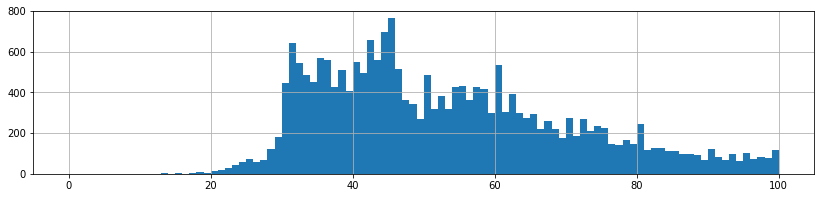

In [86]:
data['total_area'].hist(range=(0,100),figsize=(14,3), bins=100);

Видно, что больше всего квартир с площадями 30-46 кв.м - это, похоже, самые популярные 1 и 2-х комнатные. Далее идут скорее всего 2 и 3 комнатные с площадью до 75 кв.м. Ну кол-во с большими площадами, начинает обратнопропорционально убывать - чем больше площадь, тем квартир меньше. Также видно, что квартиры сильно меньше 30 кв.м тоже довольно редки. (Распределение более похоже на распределение Пуассона

0    3
1    1
2    2
3    3
4    2
5    1
6    1
Name: rooms, dtype: int64 count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


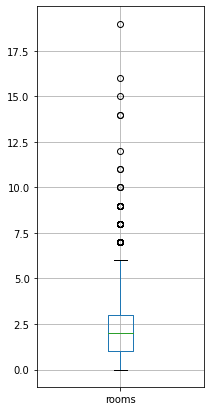

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


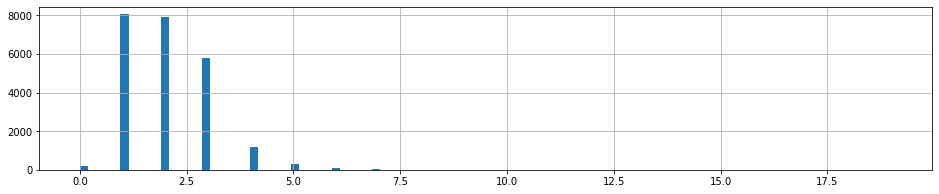

In [87]:
descr_numeric('rooms')
print(data['rooms'].value_counts())

Здесь всё в порядке!

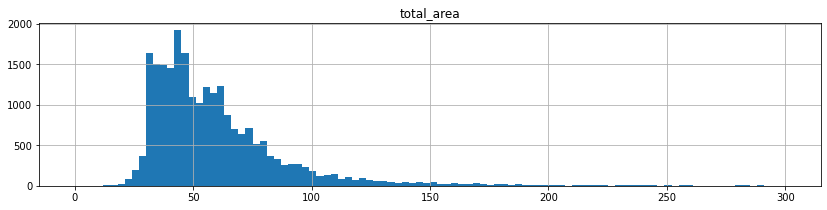

In [88]:
basket = 100
data.hist('total_area', bins=basket, figsize=(14,3), range=(0, 300));

In [89]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Здесь всё в порядке!

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>


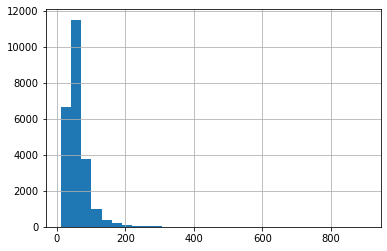

In [90]:
#код ревьюера
data['total_area'].hist(bins=30);

In [91]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [92]:
data = data.drop(np.where(data['total_area'] > 300)[0])

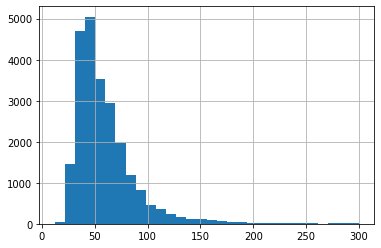

In [93]:
data['total_area'].hist(bins=30);

In [94]:
print((data.shape[0] / data_old.shape[0]))

0.9974260517321406


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Есть 2 варианта:
    1. Ты чистишь данные в изначальном датафрейме и когда заканчиваешься у тебя получается итоговая версия (new_data). После этого ты создаёшь переменную в которую подгружаешь данные без обработки (old_data) и одно делишь на другое
    2. Перед тем как чистить данные, ты можешь сделать копию своего датафрейма (new_data) и когда закончишь очистку сравнить его с тем, что было (old_data)
    
    P.S. Названия переменных могут быть любые. Смысл в том, чтобы новые данные разделить на старрые данные и увидеть разницу
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 
<br>Отличная работа!
</div>

### У МЕНЯ ВСЁ ПОЛУЧИЛОСЬ   V2 Отбросили пример 0.3%

# Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами:

### 3.1 Цена одного квадратного метра

In [95]:
data['sq_metr_pr'] = data['last_price'] / data['total_area']
data['sq_metr_pr'] = data['sq_metr_pr'].astype(int)
display(data['sq_metr_pr'].sample(3))
display(data.sample(3))
data['sq_metr_pr'].dtype

5246      46296
16300    122257
12352    160070
Name: sq_metr_pr, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr
1775,9,2800000,30.0,2017-06-22,1,2.65,9.0,15.2,6,False,False,False,6.7,0.0,Санкт-Петербург,29186.0,12791.0,0,460.0,1,908.0,13.0,93333
13158,4,6660000,50.7,2015-08-28,1,2.80,10.0,20.5,5,False,False,False,11.1,2.0,Санкт-Петербург,23617.0,5223.0,0,460.0,1,874.0,722.0,131360
22108,11,6640000,80.0,2018-03-05,3,2.65,25.0,45.4,14,False,False,False,13.8,0.0,Санкт-Петербург,38786.0,15658.0,0,460.0,0,503.0,60.0,83000


dtype('int64')

### 3.2 День недели публикации (0 - понедельник, 1 - вторник и так далее), месяц, год

In [96]:
data['day_exp'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year
display(data[['day_exp', 'month_exp', 'year_exp']].sample(8))
display(data.sample(3))

,day_exp,month_exp,year_exp
20395,1,7,2018
11586,1,8,2018
6155,2,5,2017
7038,2,3,2015
7799,2,10,2018
15154,1,7,2018
15441,2,4,2018
8950,3,3,2018


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr,day_exp,month_exp,year_exp
368,19,12500000,85.00,2018-09-21,3,3.70,6.0,56.5,6,False,False,False,22.000000,0.0,Санкт-Петербург,27084.0,5777.0,2,516.0,1,36.0,4.0,147058,4,9,2018
6344,0,7590000,73.72,2018-07-14,3,2.50,9.0,35.9,3,False,False,False,17.299999,0.0,Санкт-Петербург,50193.0,13645.0,1,501.0,1,310.0,226.0,102957,5,7,2018
16252,17,11000000,78.30,2017-12-10,4,2.65,5.0,52.6,5,False,False,False,13.500000,1.0,Санкт-Петербург,21927.0,1813.0,0,460.0,2,54.0,90.0,140485,6,12,2017


### 3.3 Тип этажа квартиры

In [97]:
# data['cat_floor'] = 'other'
# # data['cat_floor'] = data['floor'].where(data['floor']==1,'firtst', 'other')
# # data['cat_floor'] = data['floor'].where(data['floor']==1, 'other')

data['cat_floor'] = np.nan # Новый столбец - категории этажа: первый, последний, другой 

def floor_insert(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['cat_floor'] = data.apply(floor_insert, axis=1)

print(data['cat_floor'].value_counts(dropna=False))

другой       17407
последний     3320
первый        2911
Name: cat_floor, dtype: int64


### 3.4 Расстояние до центра города в километрах

In [98]:
loc_df = pd.DataFrame(columns=['original'])
loc_df['original'] = data.loc[(data['locality_name'].isna()==False),'locality_name'].sort_values(na_position='last').unique()
for ind in loc_df.index:
    loc_df.loc[ind, 'dist_centre'] = data.loc[ data['locality_name']==loc_df.loc[ind, 'original'], 'cityCenters_nearest' ].mean()
    loc_df.loc[ind, 'dist_airp'] = data.loc[ data['locality_name']==loc_df.loc[ind, 'original'], 'airports_nearest' ].mean()
    loc_df.loc[ind, 'dist_park'] = data.loc[ data['locality_name']==loc_df.loc[ind, 'original'], 'parks_nearest' ].mean()
    loc_df.loc[ind, 'dist_pond'] = data.loc[ data['locality_name']==loc_df.loc[ind, 'original'], 'ponds_nearest' ].mean()
display(loc_df.head(20))

,original,dist_centre,dist_airp,dist_park,dist_pond
0,Бокситогорск,NaN,NaN,NaN,NaN
1,Волосово,NaN,NaN,NaN,NaN
2,Волхов,NaN,NaN,NaN,NaN
3,Всеволожск,NaN,NaN,NaN,NaN
4,Выборг,NaN,NaN,NaN,NaN
5,Высоцк,NaN,NaN,NaN,NaN
6,Гатчина,NaN,NaN,NaN,NaN
7,Зеленогорск,54617.583333,73300.250000,189.583333,491.166656
8,Ивангород,NaN,NaN,NaN,NaN
9,Каменногорск,NaN,NaN,NaN,NaN


Теперь попробуем разобраться с пропусками. Надо изучить расстояния которые даны, чтобы определить что это за населенный пункт

In [99]:
nan_loc_df = data.loc[data['locality_name'].isna()==True, ['cityCenters_nearest', 'airports_nearest', \
                                                           'parks_nearest', 'ponds_nearest']]
nan_loc_df.head()

,cityCenters_nearest,airports_nearest,parks_nearest,ponds_nearest
1097,4258.0,23478.0,NaN,NaN
2033,NaN,NaN,NaN,NaN
2603,17369.0,22041.0,NaN,374.0
2632,17369.0,22041.0,NaN,374.0
3574,8127.0,27419.0,NaN,603.0


In [100]:
# Удалим пропуски в 2 столбцах
nan_loc_df = nan_loc_df.dropna(subset=['cityCenters_nearest', 'airports_nearest'])
nan_loc_df['loc_list'] = np.nan
nan_loc_df

,cityCenters_nearest,airports_nearest,parks_nearest,ponds_nearest,loc_list
1097,4258.0,23478.0,NaN,NaN,NaN
2603,17369.0,22041.0,NaN,374.0,NaN
2632,17369.0,22041.0,NaN,374.0,NaN
3574,8127.0,27419.0,NaN,603.0,NaN
4151,3902.0,25054.0,485.0,722.0,NaN
4189,3039.0,21774.0,690.0,953.0,NaN
4670,5382.0,26534.0,446.0,376.0,NaN
5343,9538.0,10556.0,67.0,NaN,NaN
5707,16788.0,21460.0,NaN,170.0,NaN
6765,17369.0,22041.0,NaN,374.0,NaN


Во всех строках присутствует информация в столбцах cityCenters_nearest и airports_nearest - как пересечение двух окружностей с радиусами равными cityCenters_nearest и airports_nearest, оно даст нам примерные местоположения которые можно сравнивать с другими пересечениями где присутствует locality_name и при совпадении мы получим неизвестный locality_name. Лучше было бы использовать 3 или 4 столбца с расстояниями, но в двух других много пропусков и слишком громоздко выйдет), будем искать похожие значения этой пары столбцов в строках датафрейма data где есть 'locality_name' с отклонением в +/-250м - delta (это значение подберем пробным путем) в столбцах cityCenters_nearest и airports_neares

In [101]:
loc_list=[] # сюда будет записываться locality_name (или множество из списка locality_name), которое совпадает(ют) по расстояниям
loc_dic = dict() # Словарь {индекс_пропущенного_значения : loc_list_совпавший_по_расстояниям_для_этого_индекса}
delta = 250 # отклонение в пределах которого искать
for i in nan_loc_df.index:
    a = nan_loc_df.loc[i, 'cityCenters_nearest'] #   Создадим для удобства,
    b = nan_loc_df.loc[i, 'airports_nearest']    #   чтобы не загромождать
    try:
        loc_list = data.query('( (@a-@delta) < cityCenters_nearest < (@a+@delta) ) and \
        ( (@b-@delta) < airports_nearest < (@b+@delta) )')['locality_name'] # .index
    except:
        loc_list = np.nan
#     print(loc_list)
    loc_dic[i] = set(loc_list)
#     input()   
# print(loc_dic)

In [102]:
for ind in nan_loc_df.index:
    print(ind, loc_dic[ind])

1097 {nan, 'Санкт-Петербург'}
2603 {nan, 'Санкт-Петербург'}
2632 {nan, 'Санкт-Петербург'}
3574 {nan, 'Санкт-Петербург'}
4151 {nan, 'Санкт-Петербург'}
4189 {nan, 'Санкт-Петербург'}
4670 {nan, 'Санкт-Петербург'}
5343 {nan, 'Санкт-Петербург'}
5707 {nan, 'Санкт-Петербург'}
6765 {nan, 'Санкт-Петербург'}
7114 {nan, 'Санкт-Петербург'}
7330 {nan, 'Санкт-Петербург'}
7600 {nan, 'Санкт-Петербург'}
8568 {nan, 'Санкт-Петербург'}
8986 {'Павловск', nan, 'Пушкин'}
9821 {nan, 'Санкт-Петербург'}
10122 {nan, 'Санкт-Петербург'}
11248 {nan, 'Санкт-Петербург'}
12879 {nan, 'Санкт-Петербург'}
12936 {nan, 'Санкт-Петербург'}
13223 {nan, 'Санкт-Петербург'}
13690 {nan, 'Санкт-Петербург'}
14273 {nan, 'Санкт-Петербург'}
15686 {nan, 'Санкт-Петербург'}
15866 {nan, 'Санкт-Петербург'}
16499 {nan, 'Санкт-Петербург'}
16561 {nan, 'Санкт-Петербург'}
16610 {nan, 'Санкт-Петербург'}
17764 {nan, 'Санкт-Петербург'}
18526 {nan, 'Санкт-Петербург'}
18917 {nan, 'Санкт-Петербург'}
19045 {nan, 'Санкт-Петербург'}
19972 {nan, 'Санкт-Пе

Хорошо видно , что по двум индексам совпала пара городов {'Пушкин', 'Павловск'}, одно значение не совпало - они нас не интересуют (их придется удалить).

В совпавших - {'Санкт-Петербург'} - им то мы и заполним соответствующие пропуски.

In [103]:
for ind in nan_loc_df.index:
    if 'Санкт-Петербург' in loc_dic[ind]:
        data.loc[ind,'locality_name'] = 'Санкт-Петербург'
    print(ind, data.loc[ind,'locality_name'])

1097 Санкт-Петербург
2603 Санкт-Петербург
2632 Санкт-Петербург
3574 Санкт-Петербург
4151 Санкт-Петербург
4189 Санкт-Петербург
4670 Санкт-Петербург
5343 Санкт-Петербург
5707 Санкт-Петербург
6765 Санкт-Петербург
7114 Санкт-Петербург
7330 Санкт-Петербург
7600 Санкт-Петербург
8568 Санкт-Петербург
8986 nan
9821 Санкт-Петербург
10122 Санкт-Петербург
11248 Санкт-Петербург
12879 Санкт-Петербург
12936 Санкт-Петербург
13223 Санкт-Петербург
13690 Санкт-Петербург
14273 Санкт-Петербург
15686 Санкт-Петербург
15866 Санкт-Петербург
16499 Санкт-Петербург
16561 Санкт-Петербург
16610 Санкт-Петербург
17764 Санкт-Петербург
18526 Санкт-Петербург
18917 Санкт-Петербург
19045 Санкт-Петербург
19972 Санкт-Петербург
20057 Санкт-Петербург
20654 Санкт-Петербург
21119 nan
21276 nan
21333 Санкт-Петербург
22474 Санкт-Петербург
22933 Санкт-Петербург
23214 Санкт-Петербург


Заполнили. Оставшиеся пропуски в data['locality_name'] удалим.

In [104]:
print('Сколько осталось пропущенных значений - ',data['locality_name'].isna().sum())
print('Размер всего data', len(data))

Сколько осталось пропущенных значений -  11
Размер всего data 23638


In [105]:
# Удаляем и переиндексируем
data.dropna(subset = ['locality_name'], inplace=True)
data.reset_index(inplace=True, drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23627 entries, 0 to 23626
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23627 non-null  int64         
 1   last_price            23627 non-null  int32         
 2   total_area            23627 non-null  float64       
 3   first_day_exposition  23627 non-null  datetime64[ns]
 4   rooms                 23627 non-null  int64         
 5   ceiling_height        23627 non-null  float64       
 6   floors_total          23627 non-null  float64       
 7   living_area           23617 non-null  float64       
 8   floor                 23627 non-null  int64         
 9   is_apartment          23627 non-null  bool          
 10  studio                23627 non-null  bool          
 11  open_plan             23627 non-null  bool          
 12  kitchen_area          23478 non-null  float32       
 13  balcony         

Проделали огромную работу, исправили названия населенных пунктов, удалили всего 11 строк, менее 0,1% от всего числа. Столбец готов

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

# Шаг 4. Проведите исследовательский анализ данных:

### 4.1 Изучите следующие параметры объектов

#### 4.1.1 Общая площадь

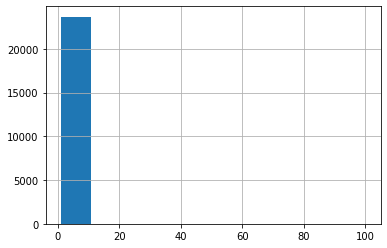

In [106]:
df['total_area'].hist();

In [107]:
df.total_area.describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99]) # общие данные

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
5%           2.500000
25%          2.600000
50%          2.650000
95%          3.130000
99%          3.600000
max        100.000000
Name: total_area, dtype: float64

 Распределение площадей вполне ожидаемое - средняя площадь 60 кв. метров, медианная 52 - то есть выбросы не так критичны. Большинство объектов до 116 квадратных метров, встречаются от 200 до 650 - менее 1% процента объектов - это можно объяснить существованием в Петербурге огромных коммунальных квартир или элитной недвижимостью. Максимальное значение - 900 - резко выделяется.

#### 4.1.2 Жилая площадь

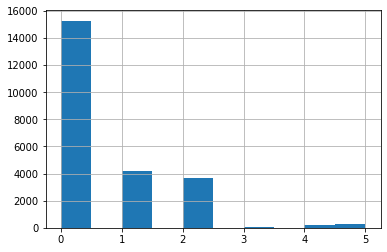

In [108]:
df['living_area'].hist();

In [109]:
 # квартиры с неуказанной жилой площадью, но не студии
len(data[(data['living_area'].isna()) & (data['studio'] == False)]) 

0

In [110]:
data['living_area'].unique()

array([ 51. ,  18.6,  34.3, ...,  99.8, 109.5, 151.4])

#### Предобработка данных была в пункте 2.1.2

#### 4.1.3 Площадь кухни

0    25.0
1    11.0
2     8.3
3    27.4
4    40.0
5     9.1
6    14.4
Name: kitchen_area, dtype: float32 count    23478.000000
mean        10.359102
std          5.212227
min          2.900000
25%          7.000000
50%          9.000000
75%         12.000000
max         40.000000
Name: kitchen_area, dtype: float64


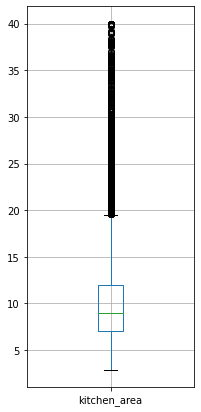

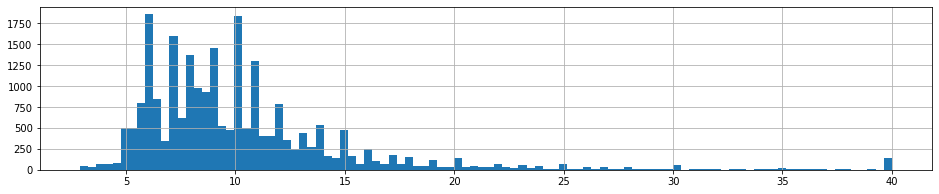

In [111]:
descr_numeric('kitchen_area')

#### Предобработка данных была в пункте 2.1.2

#### 4.1.4 Цена объекта

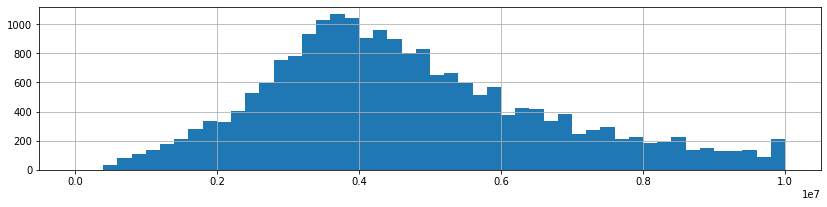

In [112]:
data['last_price'].hist(range=(0,10000000),figsize=(14,3), bins=50);

In [113]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].dtype

dtype('float64')

In [114]:
print(data['last_price'].max())
print(data['last_price'].min())

330.0
0.01219


In [115]:
data = data.loc[(data['last_price']>0.4) & (data['last_price']<100)]
#data = data.query('400000 < last_price < 100000000')
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['last_price'].describe())

RangeIndex(start=0, stop=23605, step=1)
count    23605.000000
mean         6.171400
std          6.072487
min          0.430000
25%          3.400000
50%          4.600000
75%          6.750000
max         99.000000
Name: last_price, dtype: float64


In [116]:
display(data.query('0.4 > last_price and last_price < 100'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr,day_exp,month_exp,year_exp,cat_floor


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr,day_exp,month_exp,year_exp,cat_floor
23600,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.800000,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490,1,3,2017,другой
23601,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542,0,1,2018,другой
23602,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,9.800000,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091,6,2,2018,первый
23603,13,11.475,76.75,2017-03-28,2,3.00,17.0,43.5,12,False,False,False,23.299999,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511,1,3,2017,другой
23604,4,1.350,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,False,False,9.000000,0.0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,41795,4,7,2017,первый


RangeIndex(start=0, stop=23605, step=1)


Можно сделать вывод, что больше всего квартир продаются по цене в диапазоне 1,8-7,5 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн. А в остальных случаях чем ниже и чем выше цена интерес пропорционально падает. (Распределение более похоже на распределение Пуассона). Мы оставили квартиры стоимость которых начинается от 400 тысяч рублей до 100 млн.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

# Поправил! v1

#### 4.1.5 Количество комнат

0    3
1    1
2    2
3    3
4    2
5    1
6    1
Name: rooms, dtype: int64 count    23605.000000
mean         2.057022
std          1.042993
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


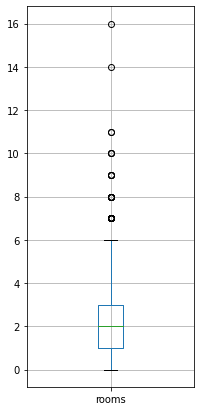

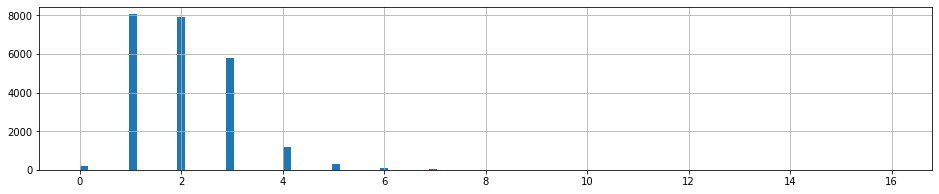

In [117]:
descr_numeric('rooms')

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для данного графика можно применить небольшую хитрость: количество корзин = максимальному числу комнат

	bins = data['rooms'].max()
</div>

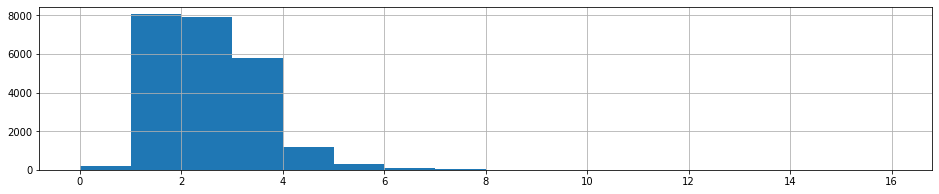

In [118]:
data['rooms'].hist(figsize=(16,3), bins=data['rooms'].max());

Есть значения 0 комнат (такого не бывает). Посмотрим значения площадей квартир в этих строках

# !!! ИСПРАВИЛ !!!

In [119]:
print(data.query('rooms == 0')['total_area'].describe())

count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64


ВСЕГО 196 ЗНАЧЕНИЙ с 0.
Видно что большинство значений 'total_area' меньше 30кв.м - это 1 комнатные. Рассмотрим поподробнее большие значения.

In [120]:
print(data.query('rooms==0 and total_area>28.4')['total_area'].sort_values())

21215    28.50
2974     28.90
12943    29.00
19804    29.00
3417     29.00
2041     29.00
23498    29.00
15650    29.00
1166     29.00
18481    29.00
10375    29.10
7228     29.20
4951     29.30
7258     30.00
22773    30.00
1588     30.00
21964    30.10
5933     30.30
19663    30.50
13818    31.00
17886    31.00
6777     31.00
3129     31.00
1516     31.00
17960    31.00
15694    31.00
17738    31.10
6194     32.00
1167     32.00
15652    32.03
15642    32.20
6980     32.30
12184    32.40
18064    32.50
16456    32.80
21544    34.00
507      34.40
4663     35.00
835      35.00
9014     38.30
16068    42.10
7209     42.63
15259    43.30
9967     44.20
13563    58.40
21144    71.00
3440     73.60
20008    98.40
Name: total_area, dtype: float64


Рассчитаем и посмотрим средние значение площади для 1,2,3,4 комнатных квартир

In [121]:
for n in range(1,5):
    print(f'{n} комнатная квартира:',data.query('rooms == @n')['total_area'].describe())
    print()

1 комнатная квартира: count    8043.000000
mean       37.568787
std         7.670882
min        12.000000
25%        32.500000
50%        36.500000
75%        41.000000
max       190.000000
Name: total_area, dtype: float64

2 комнатная квартира: count    7934.000000
mean       55.826835
std        13.097445
min        20.000000
25%        46.000000
50%        53.000000
75%        62.000000
max       196.000000
Name: total_area, dtype: float64

3 комнатная квартира: count    5805.000000
mean       77.632277
std        22.750533
min        40.100000
25%        62.000000
50%        72.900000
75%        87.000000
max       280.000000
Name: total_area, dtype: float64

4 комнатная квартира: count    1168.000000
mean      105.638716
std        38.644245
min        42.000000
25%        77.600000
50%        98.755000
75%       124.775000
max       295.000000
Name: total_area, dtype: float64



Все что ниже 40 кв.м - сделаем 1 комнатными
1. от 40 до 60 кв.м - сделаем 2 комнатной
2. от 60 до 80 кв.м сделаем 3 комнатными
3. от 80 кв.м сделаем 4 комнатной
4. 371 кв.м удалим, так как сложно понять сколько здесь комнат

In [122]:
zero_room_index_list = data[data['rooms']==0].index

In [123]:
data.loc[(data['rooms']==0) & (data['total_area']<40), 'rooms'] = 1
data.loc[(data['rooms']==0) & (data['total_area']>40) & (data['total_area']<60), 'rooms'] = 2
data.loc[(data['rooms']==0) & (data['total_area']>60) & (data['total_area']<80), 'rooms'] = 3
data.loc[(data['rooms']==0) & (data['total_area']>80) & (data['total_area']<130), 'rooms'] = 4

In [124]:
print("Кол-во строк перед удалением", data.shape, len(data))
data.drop(data.loc[(data['rooms']==0) & (data['total_area']==371)].index,inplace=True, axis=0)
print("Кол-во строк после удаления", data.shape, len(data))

Кол-во строк перед удалением (23605, 27) 23605
Кол-во строк после удаления (23605, 27) 23605


Переиндексируем и проверим весь data

In [125]:
data.reset_index(inplace=True, drop=True)

In [126]:
display(data.tail())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr,day_exp,month_exp,year_exp,cat_floor
23600,9,9.700,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.800000,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72490,1,3,2017,другой
23601,14,3.100,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542,0,1,2018,другой
23602,18,2.500,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,9.800000,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44091,6,2,2018,первый
23603,13,11.475,76.75,2017-03-28,2,3.00,17.0,43.5,12,False,False,False,23.299999,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,149511,1,3,2017,другой
23604,4,1.350,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,False,False,9.000000,0.0,поселок Новый Учхоз,NaN,NaN,0,NaN,0,NaN,NaN,41795,4,7,2017,первый


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23605 entries, 0 to 23604
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23605 non-null  int64         
 1   last_price            23605 non-null  float64       
 2   total_area            23605 non-null  float64       
 3   first_day_exposition  23605 non-null  datetime64[ns]
 4   rooms                 23605 non-null  int64         
 5   ceiling_height        23605 non-null  float64       
 6   floors_total          23605 non-null  float64       
 7   living_area           23595 non-null  float64       
 8   floor                 23605 non-null  int64         
 9   is_apartment          23605 non-null  bool          
 10  studio                23605 non-null  bool          
 11  open_plan             23605 non-null  bool          
 12  kitchen_area          23456 non-null  float32       
 13  balcony         

In [127]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6, 11,  7,  8, 10,  9, 16, 14])

Удалили всего одну строку. Остальные пропуски заменили логически подходящими. Отлично. Столбец готов

#### 4.1.6 Высота потолков
Предобработка данных в 2.1.1

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
Name: ceiling_height, dtype: float64 count    23605.000000
mean         2.722532
std          0.988844
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


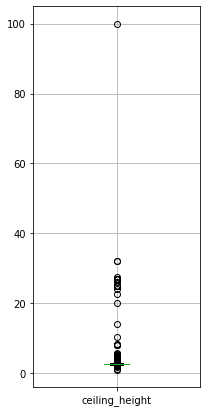

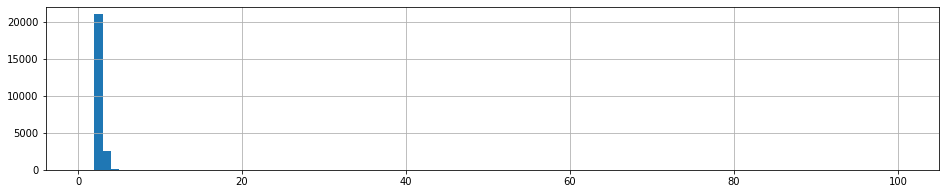

In [128]:
descr_numeric('ceiling_height')

Здесь всё в порядке, привели сантиметры в метры.

#### 4.1.7 Этаж

0     8
1     1
2     4
3     9
4    13
5     5
6     6
Name: floor, dtype: int64 count    23605.000000
mean         5.895827
std          4.887416
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


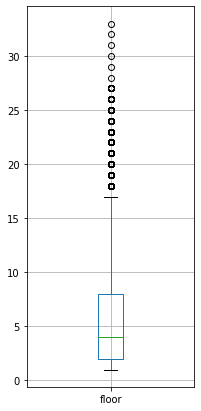

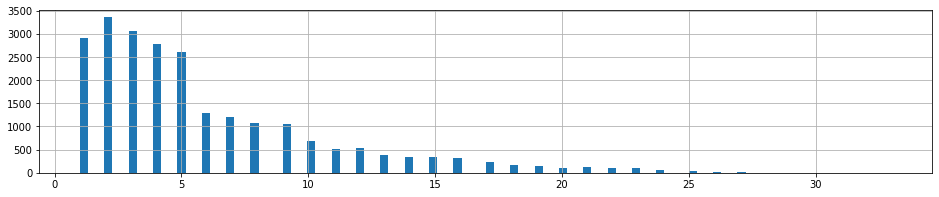

In [129]:
descr_numeric('floor')

Здесь всё в порядке.

#### 4.1.8 Тип этажа квартиры

In [130]:
data['cat_floor'] = np.nan # Новый столбец - категории этажа: первый, последний, другой 

def floor_insert(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['cat_floor'] = data.apply(floor_insert, axis=1)

print(data['cat_floor'].value_counts(dropna=False))

другой       17382
последний     3314
первый        2909
Name: cat_floor, dtype: int64


Здесь всё в порядке.

#### 4.1.9 Всего этажей в доме

0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
5    12.0
6    26.0
Name: floors_total, dtype: float64 count    23605.000000
mean        10.689007
std          6.595177
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


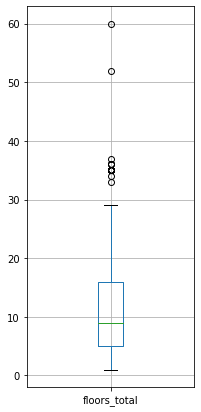

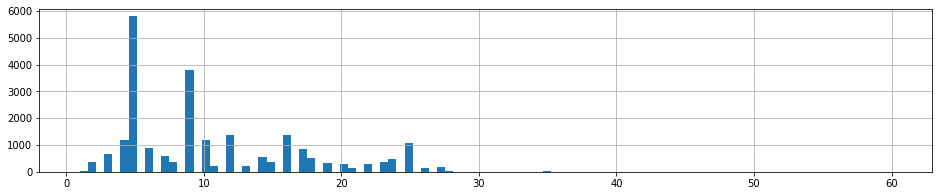

In [131]:
descr_numeric('floors_total')

In [132]:
print(data['floors_total'].value_counts())
print(data.query('floors_total.isna()').head(7))

5.0     5797
9.0     3782
16.0    1375
12.0    1364
4.0     1186
10.0    1176
25.0    1073
6.0      899
17.0     836
3.0      657
7.0      579
14.0     556
18.0     508
24.0     469
8.0      383
2.0      380
15.0     365
23.0     354
19.0     341
22.0     287
20.0     273
13.0     230
11.0     209
27.0     164
21.0     159
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, sq_metr_pr, day_exp, month_exp, year_exp, cat_floor]
Index: []


#### 4.1.10 Расстояние до центра в метрах

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5        NaN
6    19143.0
Name: cityCenters_nearest, dtype: float64 count    18219.000000
mean     14260.710687
std       8617.175673
min        181.000000
25%       9356.000000
50%      13123.000000
75%      16337.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


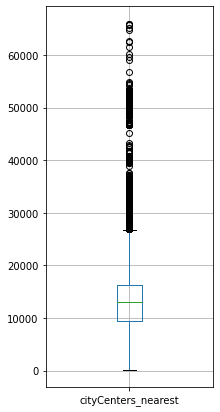

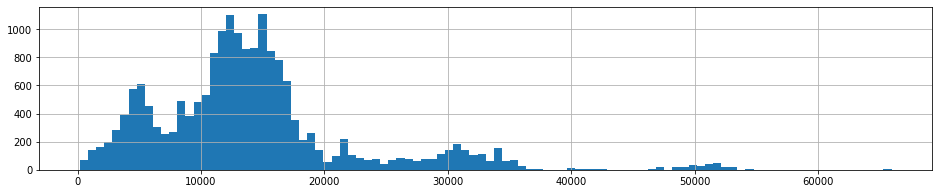

In [133]:
descr_numeric('cityCenters_nearest')

Выбросов вроде нет, значения распределены равномерно

#### 4.1.11 Расстояние до аэропорта

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
5        NaN
6    52996.0
Name: airports_nearest, dtype: float64 count    18075.000000
mean     28800.981632
std      12647.331699
min          0.000000
25%      18557.000000
50%      26756.000000
75%      37302.000000
max      84869.000000
Name: airports_nearest, dtype: float64


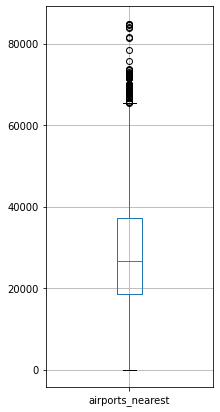

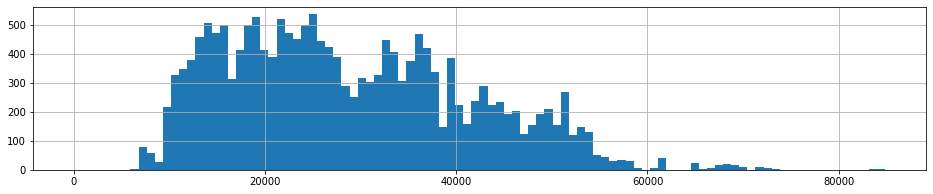

In [134]:
descr_numeric('airports_nearest')

Выбросов вроде нет зато есть нули, надо рассмотреть подробнее

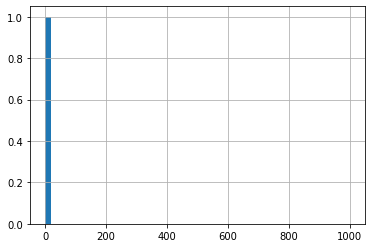

In [135]:
data['airports_nearest'].hist(range=(0,1000),bins=50);

In [136]:
data[data['airports_nearest']<50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metr_pr,day_exp,month_exp,year_exp,cat_floor
21003,0,7.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0,460.0,0,503.0,60.0,201729,6,9,2018,другой


Всего одна строка, это Санкт-Петербург, 0 заменили на Nan и обработаем вместе с остальными пропусками

In [137]:
data.loc[21003, 'airports_nearest'] = np.nan
data.loc[21003]

total_images                              0
last_price                              7.0
total_area                             34.7
first_day_exposition    2018-09-23 00:00:00
rooms                                     1
ceiling_height                          2.7
floors_total                            9.0
living_area                            19.8
floor                                     3
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                            6.0
balcony                                 2.0
locality_name               Санкт-Петербург
airports_nearest                        NaN
cityCenters_nearest                 22801.0
parks_around3000                          0
parks_nearest                         460.0
ponds_around3000                          0
ponds_nearest                         503.0
days_exposition                        60.0
sq_metr_pr                      

Все пропуски заполним медианами значений airports_nearest (если оно будет не NaN) из других строк где совпадает locality_name

In [138]:
# loc_median - здесь сохрним медианы расстояний по населенным пунктам

print('Медианы расстояний airports_nearest в locality_name : ')
loc_median = data.groupby('locality_name')['airports_nearest'].median().sort_values()
loc_median = loc_median.dropna()
display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]


print('Проверка работы med_insert: поселок Понтонный - ', med_insert('поселок Понтонный')) 
print('Проверка работы med_insert: поселок Усть-Ижора - ', med_insert('поселок Усть-Ижора'))

Медианы расстояний airports_nearest в locality_name : 


locality_name
поселок Александровская    12896.5
Пушкин                     15766.0
поселок Шушары             17427.0
Павловск                   20529.5
поселок Петро-Славянка     20605.0
Красное Село               25714.0
поселок Металлострой       25758.0
Колпино                    26232.0
поселок Усть-Ижора         26510.5
Санкт-Петербург            26757.0
поселок Стрельна           28317.0
поселок Понтонный          30642.0
поселок Саперный           34147.5
Петергоф                   39231.0
Ломоносов                  48415.5
Name: airports_nearest, dtype: float64

Проверка работы med_insert: поселок Понтонный -  30642.0
Проверка работы med_insert: поселок Усть-Ижора -  26510.5


#### 4.1.12 Расстояние до парка

0    482.0
1      NaN
2     90.0
3     84.0
4    112.0
5      NaN
6    733.0
Name: parks_nearest, dtype: float64 count    17584.000000
mean       476.093977
std        235.559716
min          1.000000
25%        428.500000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


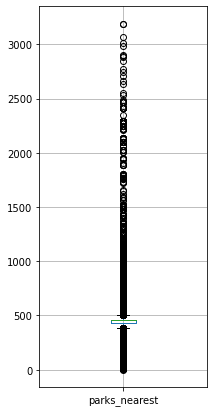

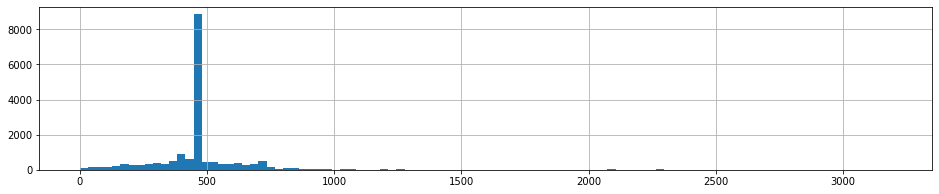

In [139]:
 descr_numeric('parks_nearest')

Значения распределены равномерно. Большая часть меньше 3000. Удалять ничего небудем.

Будем заполнять пропуски по аналогии со столбцом cityCenters_nearest и airports_nearest по соответствию населенному пункту

In [140]:
# loc_median - здесь сохрним медианы расстояний по населенным пунктам

print('Медианы расстояний parks_nearest в locality_name : ')
loc_median = data.groupby('locality_name')['parks_nearest'].median().sort_values()
loc_median = loc_median.dropna()
display(loc_median.head(15))

# Функция для присваивания пропуску значения медианы
def med_insert(loc_dist):
    if loc_dist not in loc_median:
        return np.nan
    return loc_median[loc_dist]


print('Проверка работы med_insert: Сестрорецк - ', med_insert('Сестрорецк')) 
print('Проверка работы med_insert: поселок Зеленогорск - ', med_insert('Зеленогорск'))

Медианы расстояний parks_nearest в locality_name : 


locality_name
Зеленогорск          147.5
Кронштадт            293.0
Петергоф             294.0
Павловск             312.0
Сестрорецк           367.0
Колпино              393.0
Пушкин               399.5
Ломоносов            407.0
Красное Село         428.5
Санкт-Петербург      460.0
поселок Стрельна     700.0
поселок Парголово    733.0
Name: parks_nearest, dtype: float64

Проверка работы med_insert: Сестрорецк -  367.0
Проверка работы med_insert: поселок Зеленогорск -  147.5


In [141]:
# Выборка для проверки
print('Всего пропущенных значений в столбце =', data['parks_nearest'].isna().sum())
test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['parks_nearest'].isna()==True)].index
print("Всего пропущенных значений в Санкт-Петербург =", len(test_ind))
display(data.loc[test_ind,['locality_name','parks_nearest']].head(12))

Всего пропущенных значений в столбце = 6021
Всего пропущенных значений в Санкт-Петербург = 23


,locality_name,parks_nearest
1090,Санкт-Петербург,NaN
2586,Санкт-Петербург,NaN
2615,Санкт-Петербург,NaN
3556,Санкт-Петербург,NaN
5684,Санкт-Петербург,NaN
6737,Санкт-Петербург,NaN
7086,Санкт-Петербург,NaN
7571,Санкт-Петербург,NaN
11204,Санкт-Петербург,NaN
12831,Санкт-Петербург,NaN


In [142]:
# ДЕЛАЕМ ЗАМЕНУ
data.loc[data['parks_nearest'].isna()==True, 'parks_nearest'] = data['locality_name'].apply(med_insert)

In [143]:
# ПРОВЕРЯЕМ
display(data.loc[test_ind,['locality_name','parks_nearest']].head(12))

,locality_name,parks_nearest
1090,Санкт-Петербург,460.0
2586,Санкт-Петербург,460.0
2615,Санкт-Петербург,460.0
3556,Санкт-Петербург,460.0
5684,Санкт-Петербург,460.0
6737,Санкт-Петербург,460.0
7086,Санкт-Петербург,460.0
7571,Санкт-Петербург,460.0
11204,Санкт-Петербург,460.0
12831,Санкт-Петербург,460.0


In [144]:
print("Кол-во пропусков оставшихся =", data['parks_nearest'].isna().sum())

Кол-во пропусков оставшихся = 5998


Было пропусков 15569 осталось 5998 - большую часть значений заполнили, теперь со значениями около 18 тысяч.

Остальные не заполняем по аналогии с другими столбцами с расстояниями

### 4.1.13 День и месяц публикации

0    3
1    1
2    3
3    4
4    1
5    0
6    3
Name: day_exp, dtype: int64 count    23605.000000
mean         2.569032
std          1.788996
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exp, dtype: float64


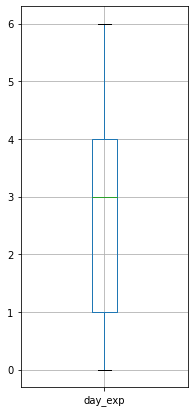

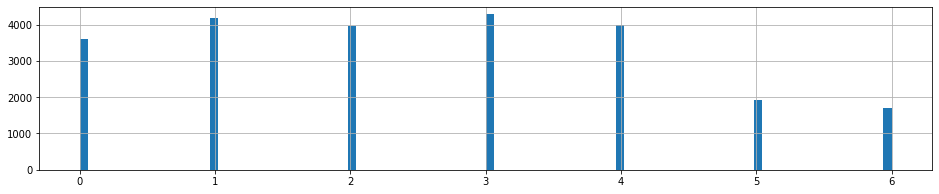

In [145]:
 descr_numeric('day_exp')

0     3
1    12
2     8
3     7
4     6
5     9
6    11
Name: month_exp, dtype: int64 count    23605.000000
mean         6.401017
std          3.492323
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64


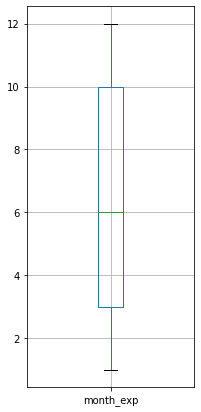

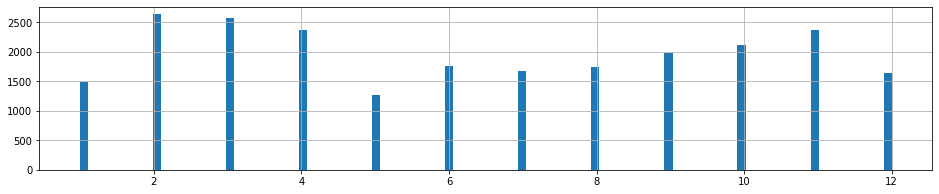

In [146]:
 descr_numeric('month_exp')

Здесь всё хорошо. Квартиры продаются практически одинакого. Сильного разброса не наблюдается.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики, но...
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>...после того как ты внесёшь правки в предыдущем разделе, то выводы могут изменится. Обязательно перепроверь их
</div>

## 4.2 Изучите как быстро продавались квартиры

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
Name: days_exposition, dtype: float32 count    20440.000000
mean       180.591293
std        219.541412
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


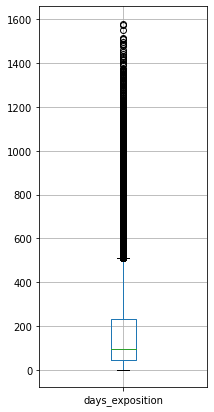

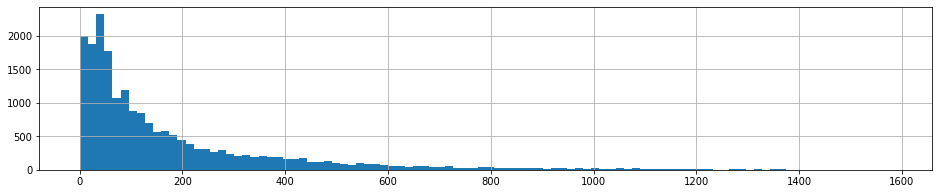

In [147]:
def descr_numeric(target_column):
    print(data[target_column].head(7), data[target_column].describe())
    data.boxplot(column=target_column, figsize=(3,7)); 
    plt.show()
    data[target_column].hist(figsize=(16,3), bins=100)
descr_numeric('days_exposition')

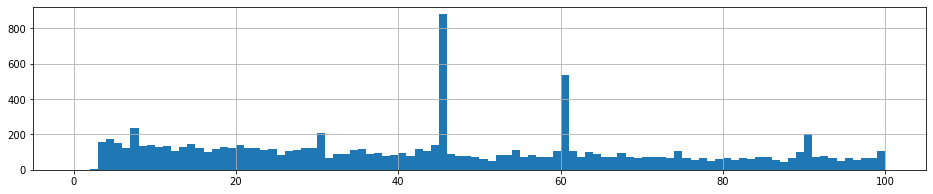

In [148]:
data['days_exposition'].hist(range=(0,100),figsize=(16,3), bins=100);

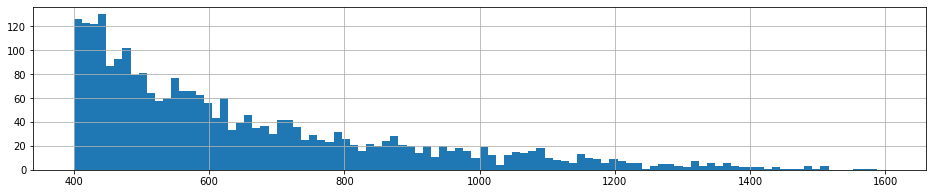

In [149]:
data['days_exposition'].hist(range=(400,1600),figsize=(16,3), bins=100);

In [150]:
print('Медиана =', data['days_exposition'].median())
print('Средняя =', data['days_exposition'].mean())

Медиана = 95.0
Средняя = 180.5913


Из приведенных значений (из верхней гистограммы) можно сделать вывод, что продажа квартиры занимает от 3 до 6 месяцев. Все что продается раньше 40 дней можно назвать быстрой продажей (находится до первого пика средней гистограммы). Необычайно долгие продажи начинаются от 2 лет (нижняя гистограмма)



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

## 4.3 Изучите какие факторы больше всего влияют на общую (полную) стоимость объекта?

### Зависимость Цены от Общей площади

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию нас просили изучить общую стоимость квартиры, а не стоимость за квадратный метр
</div>

Корелляция цены от total_area 0.7548690875934159


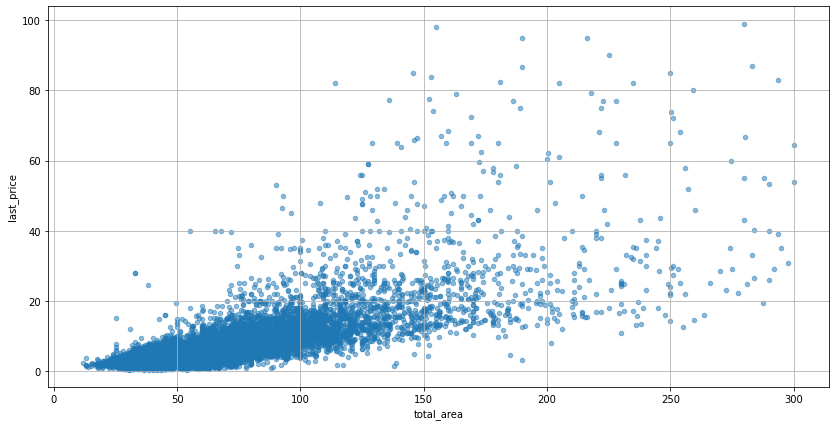

In [151]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

corr1('total_area')

Из графика видно , что зависимость цены от площади есть, но она не такая уж сильная. При возрастании площади и цена возрастает

# !!! ИСПРАВИЛ !!!



### Зависимость Цены от Кол-ва комнат

0.013225582037103195

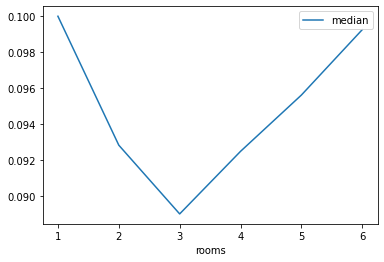

In [152]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_per_square_meter'])

Вывод: чем ближе количество комнат к 3 тем ниже стоимость квадратного метра."

Корелляция цены от rooms 0.46172296287278153


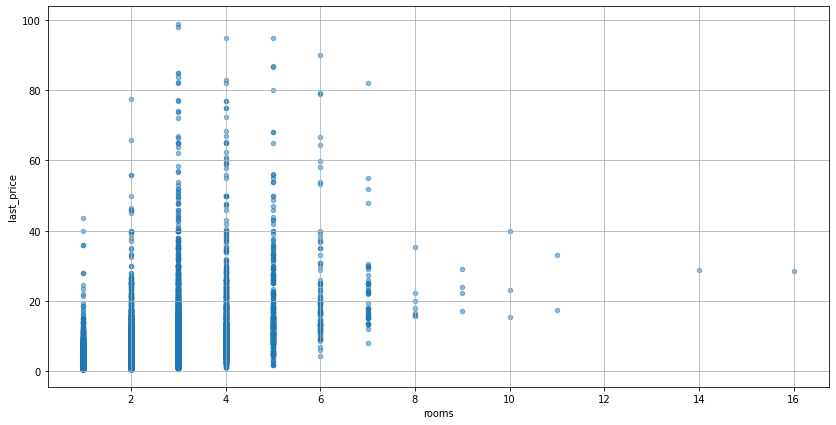

In [153]:
corr1('rooms')

Из графика видно , что зависимость цены от кол-ва комнат слабо прослеживается. Она увеличивается, при возрастании комнат от 1 до 3. Очень много квартир от 1 до 6 комнат в диапазоне до 30 млн - это показывает что зависимость всетаки довольно слаба и уже в квартирах от 3 комнат уже отсутствует

### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

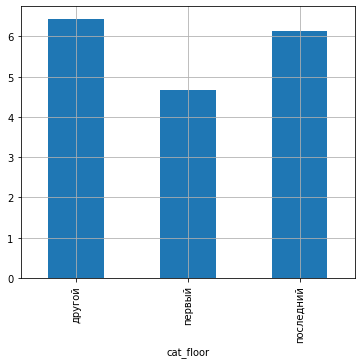

In [154]:
#Вычислим среднюю цену в каждой категории
cat_fl_mean = data.groupby('cat_floor')['last_price'].mean();
# cat_fl_mean.plot(x=0, y=1, kind='bar', grid=True, figsize=(10,5));
# plt.show()
cat_fl_mean.plot(x=cat_fl_mean.index, y=cat_fl_mean.values, kind='bar', grid=True, figsize=(6,5));


Гистограмма четко показывает - первый этаж любят меньше всего - поэтому средняя цена ниже всех(чем меньше спрос, тем меньше цена). Более предпочтителен другой этах - не первый и не последний - на него цена выше

### Зависимость цены от даты размещения

Корелляция цены от day_exp -0.006196567990600103
Корелляция цены от month_exp 0.007987143535605815
Корелляция цены от year_exp -0.05535058027614158


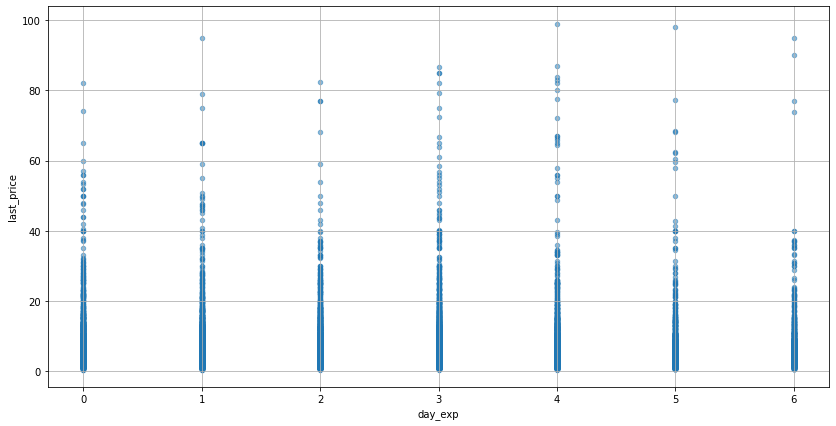

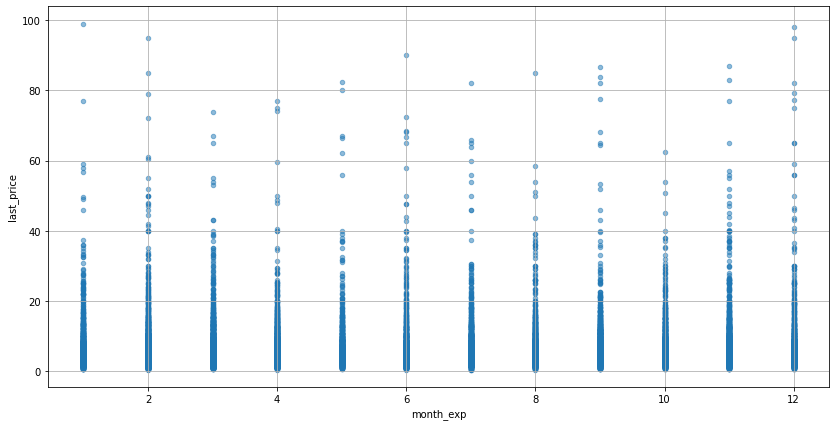

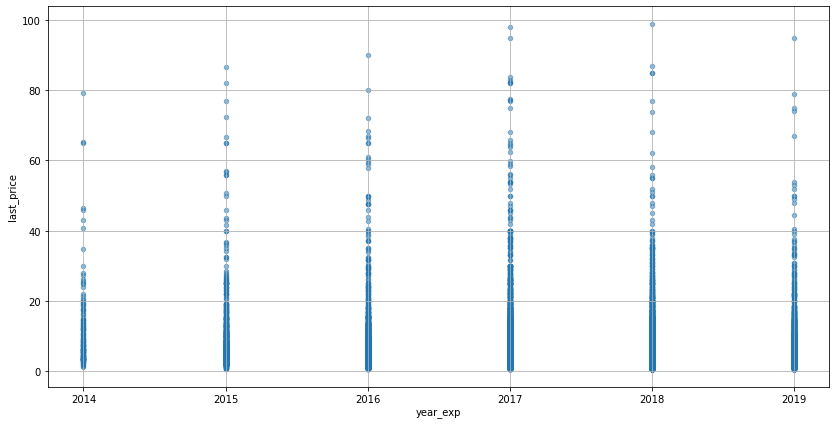

In [155]:
corr1('day_exp')
corr1('month_exp')
corr1('year_exp')

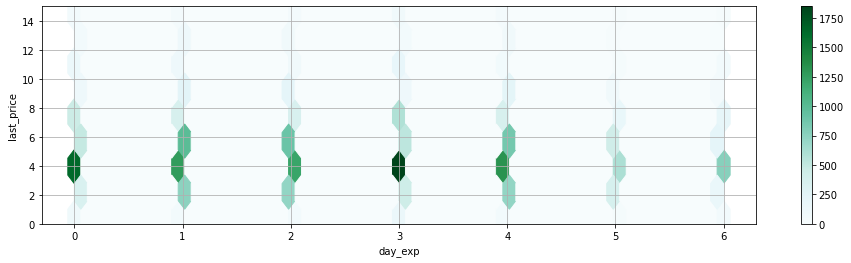

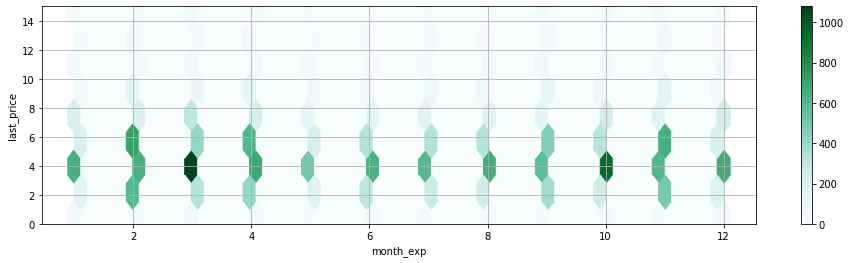

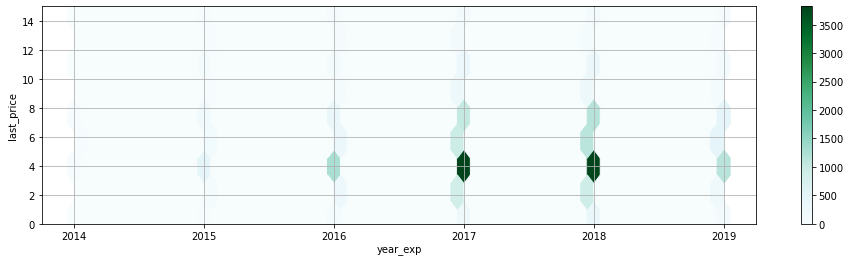

In [156]:
data.plot(x='day_exp', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15));
data.plot(x='month_exp', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15));
data.plot(x='year_exp', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15));

Цена НЕ зависит от дня недели, месяца и года размещения объявления (зато количество размешений зависит)


### Зависимость цены от площади кухни

Корелляция цены от kitchen_area 0.591876542685813


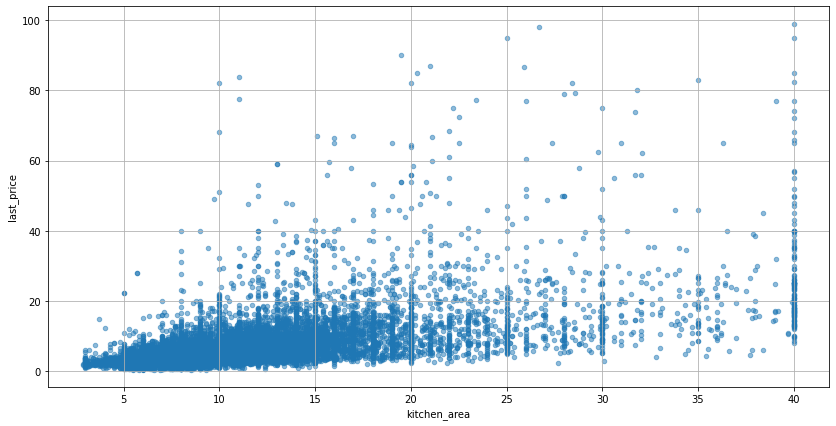

In [157]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);
corr1('kitchen_area')

Зависимости от площади кухни особо нет.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё добавим расчет корреляции для общей площади, жилой площади, площади кухни и количества комнат используя .corr(). Также у тебя не хватает изучения зависимости цены от жилой площади, месяца и года публикации объявления
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

# !!! ИСПРАВИЛ !!!

## 4.4 Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [158]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
#самая высокая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
print(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])


                 count      mean
locality_name                   
Санкт-Петербург  15680  0.113537
               count      mean
locality_name                 
Выборг           237  0.058142


Вывод: самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут вместо таблицы можно построить гистограмму, так будет более наглядно)
</div>

## 4.5 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name') и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,price_per_square_meter
cityCenters_nearest_km,
0,0.176884
1,0.146888
2,0.139364
3,0.123498
4,0.135623
5,0.142332
6,0.149953
7,0.137382
8,0.120378


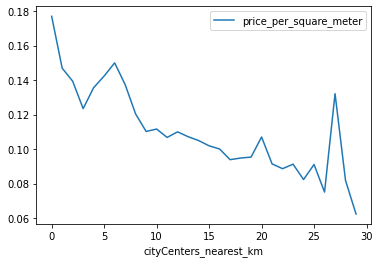

In [159]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

In [160]:
spb_center = data.query('(locality_name == "Санкт-Петербург")')

In [161]:
print('В Санкт-Петербурге квартир:', spb_center['locality_name'].count())

В Санкт-Петербурге квартир: 15680


In [162]:
spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'cityCenters_nearest']].reset_index(drop=True)
spb['dist_center_km'] = round(spb['cityCenters_nearest']/1000).astype(int)
print(spb.sample(10))

       last_price  cityCenters_nearest  dist_center_km
6564       4.2000              11729.0              12
2070      10.9124              12244.5              12
11288      7.7000               7682.0               8
9036       5.1000              11373.0              11
8236      19.9000               5864.0               6
3073       6.2000              13222.0              13
13530      4.1000               6724.0               7
7613       7.9000              13056.0              13
11383      3.7900              13950.0              14
1456       6.0000              16268.0              16


In [163]:
price_km_spb = spb.pivot_table(index='dist_center_km', values='last_price', aggfunc='mean') # Вариант №2
price_km_spb.head(8)

,last_price
dist_center_km,
0,26.543313
1,15.773935
2,14.497509
3,10.645139
4,11.332503
5,12.437432
6,13.135140
7,13.785780


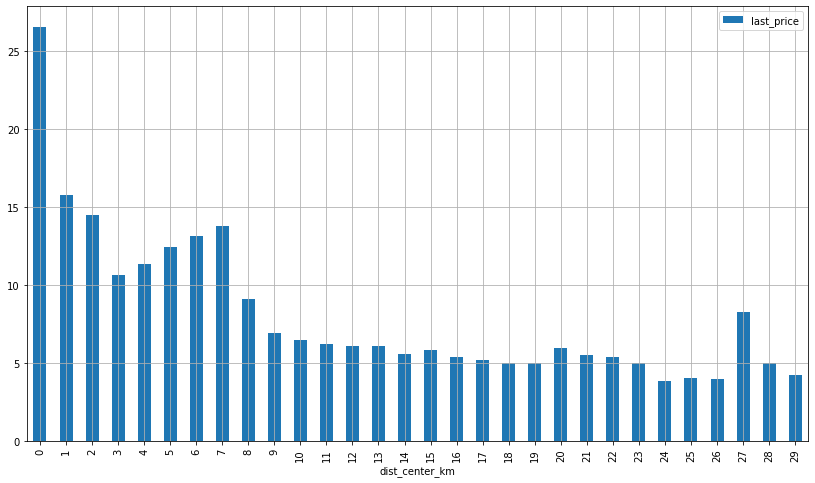

In [164]:
price_km_spb.plot(kind='bar', grid=True, figsize=(14,8));

ВЫВОД: По гистограмме видно, что на расстоянии ДО 1 (это 0 км) км от центра цена очень высока (около 26,5 млн.р за квартиру) и сильно меняется уже после 1 км. от центра (16,3 млн.р за квартиру), все, что в радиусе до 1 км от центра - это и есть "самый центр".
Есть еще одна граница, она находится в районе 8 км от самого центра, после которой следует сильное падение цены (с 14млн до 9млн) и после начинает убывать постепенно.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

# Шаг 5. Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что стоимость квартир в среднем по рынку была ниже на 10-20 %, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ.

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 3 км в центре СПБ.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- корректно заполнить пропуски в столбце ceiling_height
<br>- не менять тип данных в столбце ceiling_height
<br>- корректно заполнить пропуски в столбце balcony
<br>- не заполнять пропуски в столбце days_exposition
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- изучить общую стоимость, а не цену за квадратный метр
<br>- внести правки в раздел с изучением зависимости цены от разных параметров
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить выводы там, где это необходимо
</div>

# КОММЕНТАРИЙ: Аномальные значения:
    площадь квартиры - всё что больше 300 метров квадратных я отбросил;
    стоимость квартир - я оставил квартиры стоимостью от 400 т.р до 100 млн. рублей;
    количество комнат - всё что меньше 40 м.кв. и там где 0 комнат заменил на 1 комнату, возможно это студии.

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

### Общий вывод



**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  устранены неявные дубликаты в названиях населённых пунктов
- [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод